# 의사결정트리와 앙상블 모델

In [49]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
from joblib import dump, load

## 의사결정 트리 (CHAID, C4.5, C5.0, CART)
### 1. 쉽다
### 2. 실용적이다(데이터전처리를 대충한다. No 표준화, No 결측치 처리)
### 3. 유연하다(수치형/범주형을 모두 다룬다)
### 4. 스무고개 방식(Split & Pruning)

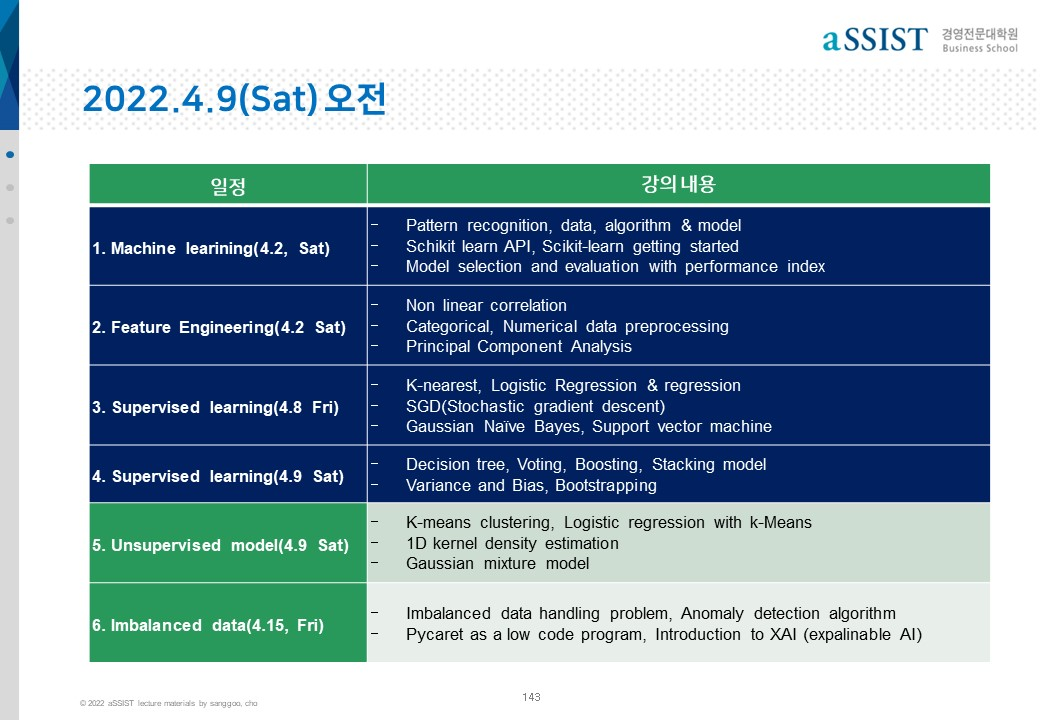

In [50]:
dir_path = r'D:\ASSIST\img'
from IPython.display import Image
width=800; height=500
Image(filename=dir_path +'/슬라이드143.jpg', width=width, height=height)

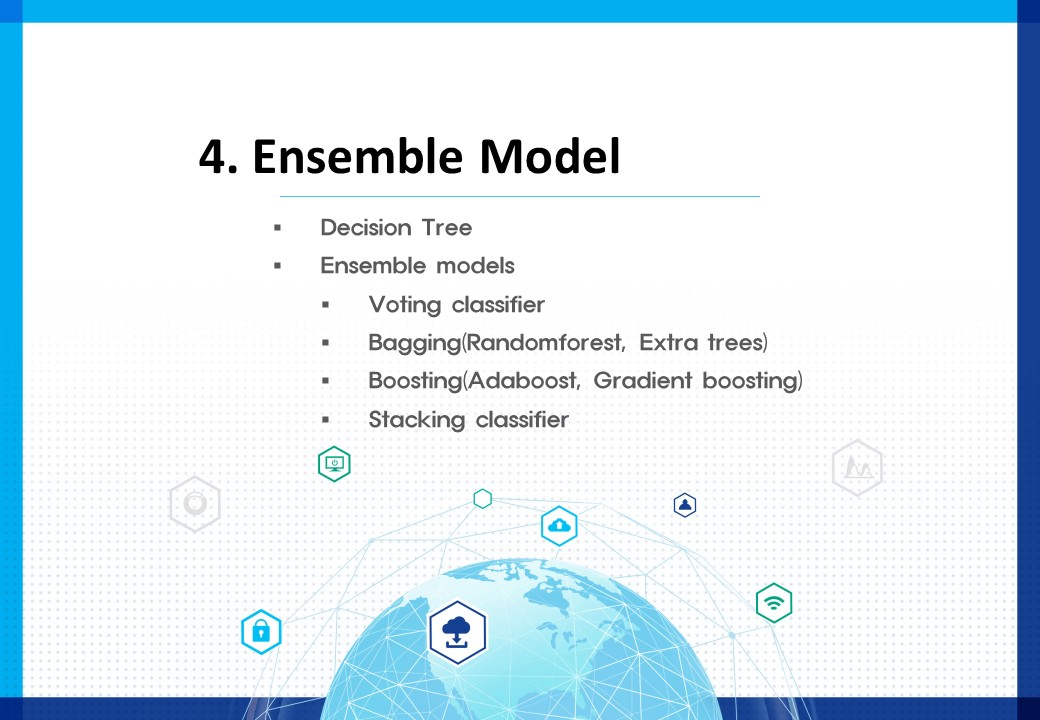

In [51]:
Image(filename=dir_path +'/슬라이드144.jpg', width=width, height=height)

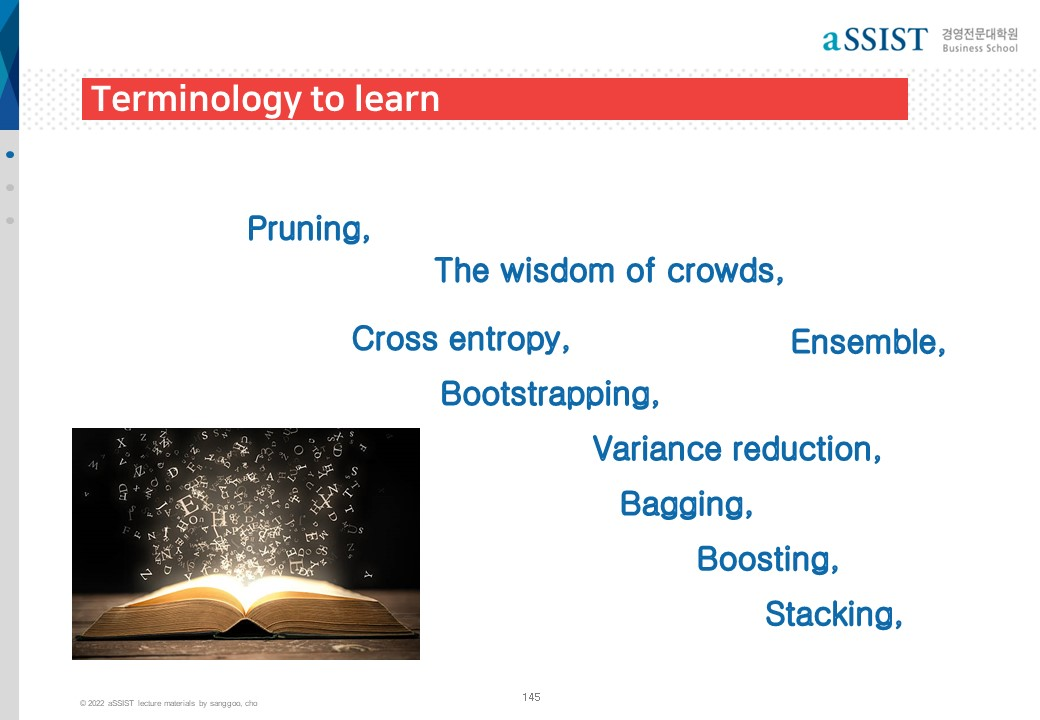

In [52]:
Image(filename=dir_path +'/슬라이드145.jpg', width=width, height=height)

## 데이터 읽고 훈련시험 데이터 준비

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X, y)

DecisionTreeClassifier(random_state=11)

<Figure size 1800x576 with 0 Axes>

No handles with labels found to put in legend.


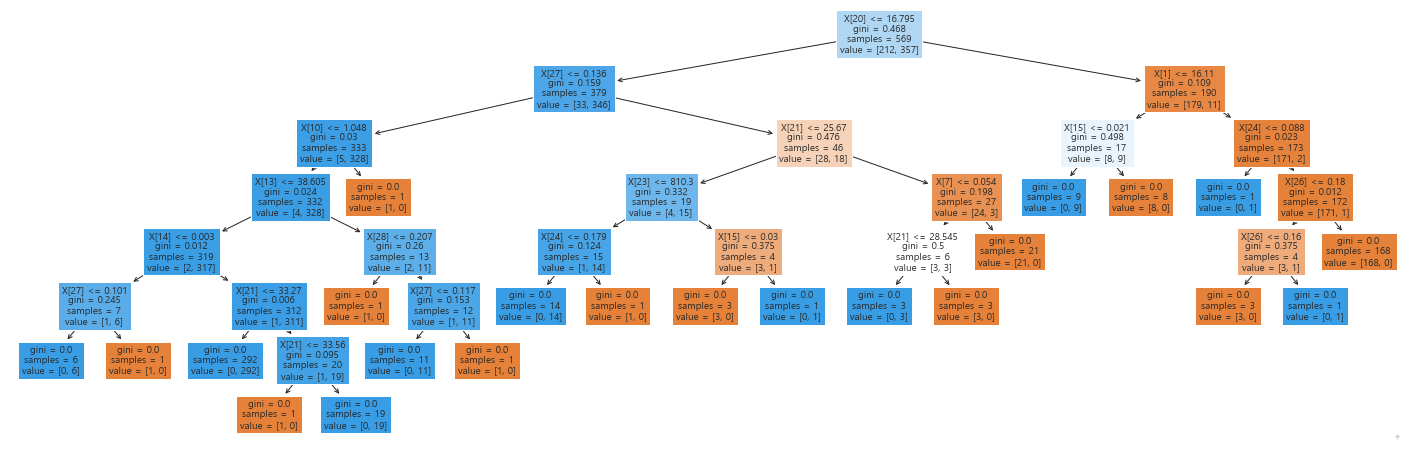

In [54]:
plt.figure(figsize=(25,8))
ax = plot_tree(dt, filled=True)
plt.legend(loc='lower right', borderpad=0, handletextpad=0)

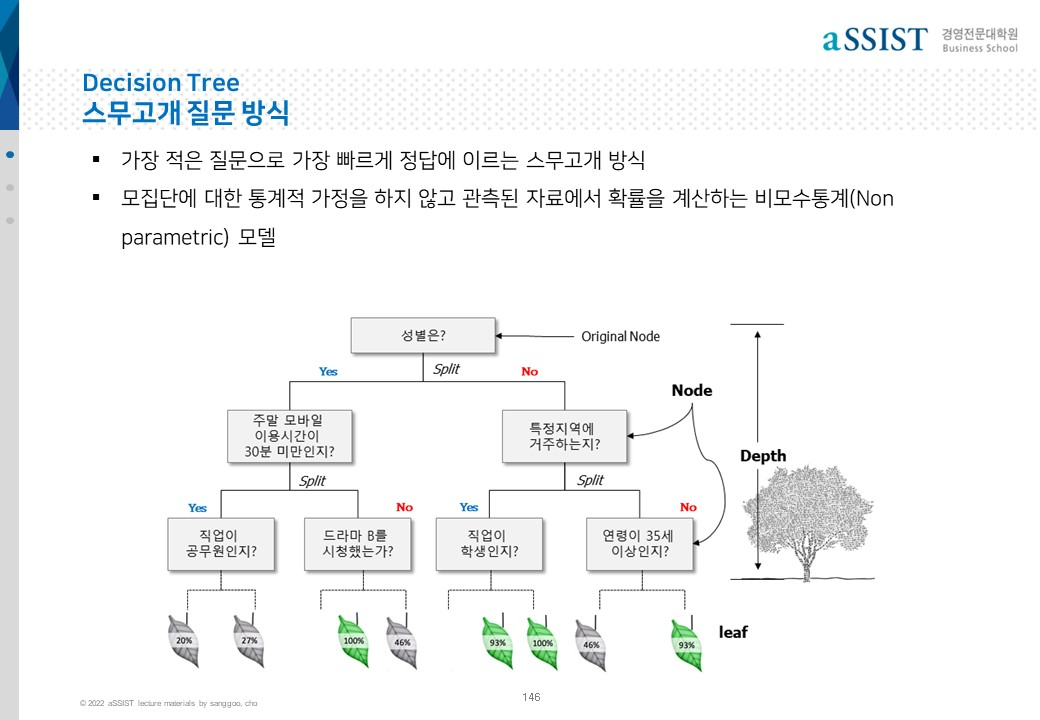

In [55]:
Image(filename=dir_path +'/슬라이드146.jpg', width=width, height=height)

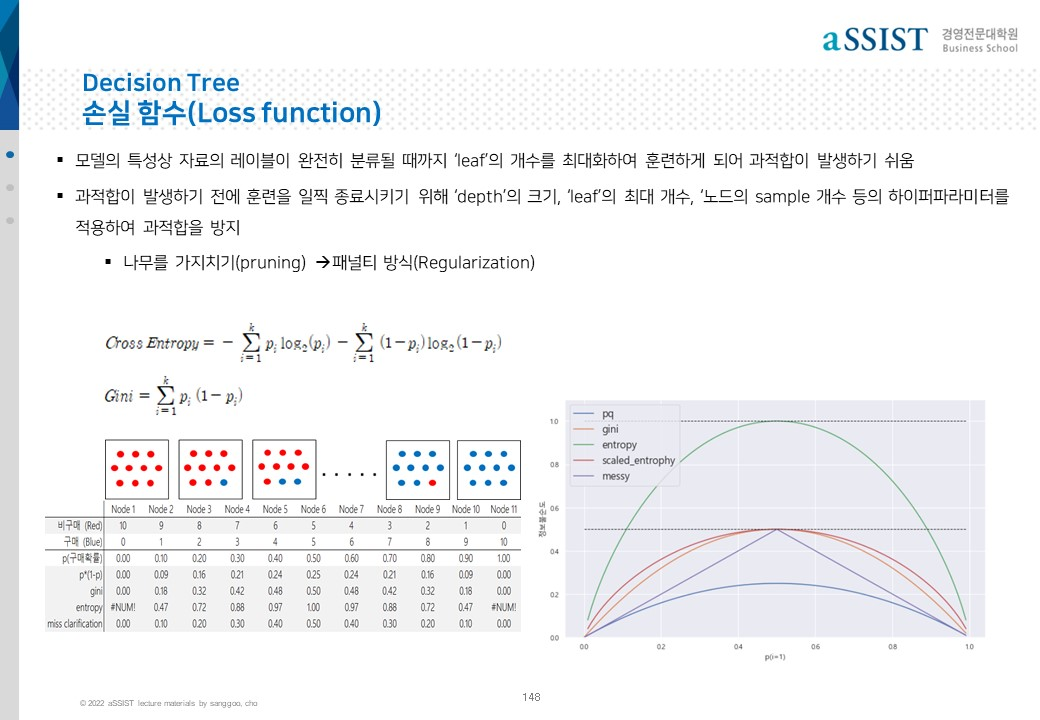

In [56]:
Image(filename=dir_path +'/슬라이드148.jpg', width=width, height=height)

## loss function

In [57]:
def pq(p):
   return p*(1 - p)
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def cross_entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def miss_clear(p):
   return 1 - np.max([p, 1 - p])

<Figure size 864x504 with 0 Axes>

(0.0, 1.1)

Text(0.5, 0, 'p(i=1)')

Text(0, 0.5, '정보불순도')

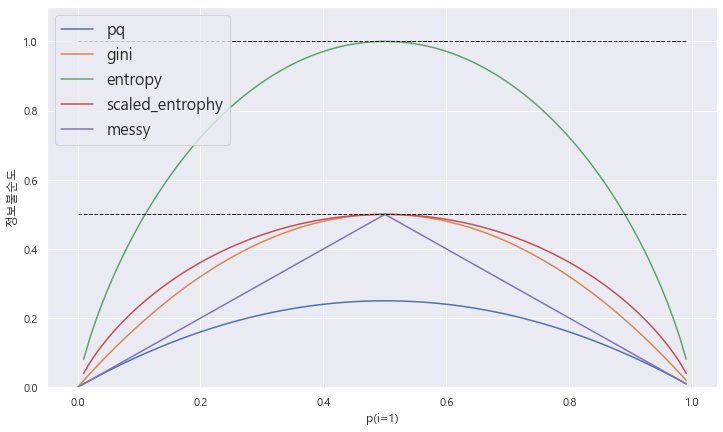

In [58]:
plt.figure(figsize=(12, 7)); plt.rc('legend', fontsize=16)
x = np.arange(0.0, 1, 0.01)
plt.plot(x, pq(x), label='pq'); plt.legend()
plt.plot(x, gini(x), label='gini'); plt.legend() # pq*2(이진분류)
plt.plot(x, [cross_entropy(p) if p != 0 else None for p in x],  label='entropy')
plt.legend()
plt.plot(x, cross_entropy(x)*0.5, label='scaled_entrophy'); plt.legend()
plt.plot(x, [miss_clear(i) for i in x], label='messy'); plt.legend()
plt.plot(x, [0.5]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.plot(x, [1.0]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1]); plt.xlabel('p(i=1)'); plt.ylabel('정보불순도')

### Model interpretability_1. 특성변수 model-based 중요도

랜덤포레스트 모델의 입력변수의 중요도(Impurity 기준)를 X축으로 하여 변수명을 시각화

In [59]:
dt.get_params()
dt.feature_importances_

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

array([0.        , 0.03120753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00877112, 0.        , 0.        ,
       0.007316  , 0.        , 0.        , 0.00204521, 0.00100384,
       0.03747995, 0.        , 0.        , 0.        , 0.        ,
       0.69559352, 0.05735376, 0.        , 0.0110859 , 0.01440488,
       0.        , 0.00747439, 0.12043256, 0.00583135, 0.        ])

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Importance')

Text(0.5, 1.0, '의사결정트리의 변수 중요도')

([<matplotlib.axis.XTick at 0x2026e437c70>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

<BarContainer object of 30 artists>

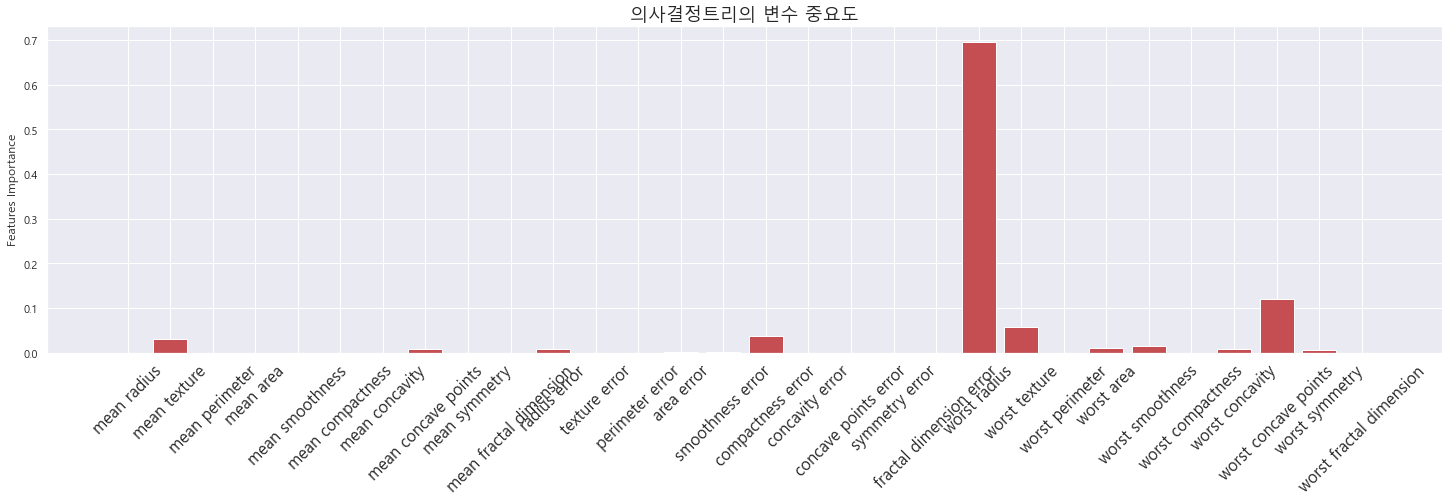

In [60]:
plt.figure(figsize=(25,6)); plt.ylabel('Features Importance')
plt.title('의사결정트리의 변수 중요도', fontsize=18)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45', fontsize=16)
plt.bar(range(X.shape[1]), dt.feature_importances_, color='r')

### Model interpretability_2. 특성변수 permutation-based 중요도

- 특정 변수의 값을 무작위로 재정렬하여(permutation) 학습하는 경우 모델의 정확도에 영향을 얼마나 주는지를 가리키는 지표
     * model_based’ 중요도의 크기와는 다르다. 사이킷런의 Permutation-based feature importance모듈을 호출
- 예측에 영향을 미치는 입력변수의 중요도가 높은 순서대로 확인

In [61]:
X_test.head()
X_test.iloc[:,0:4].apply(np.random.permutation).head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
186       18.310         18.58          118.60     1041.0          0.08588   
409       12.270         17.92           78.41      466.1          0.08685   
470        9.667         18.49           61.49      289.1          0.08946   
543       13.210         28.06           84.88      538.4          0.08671   
37        13.030         18.42           82.61      523.8          0.08983   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
186           0.08468         0.08169              0.05814         0.1621   
409           0.06526         0.03211              0.02653         0.1966   
470           0.06258         0.02948              0.01514         0.2238   
543           0.06877         0.02987              0.03275         0.1628   
37            0.03766         0.02562              0.02923         0.1467   

     mean fractal dimension  ...  worst radius  worst texture  \
186                 0.05425  ...         21.31          26.36   
409                 0.05597  ...         14.10          28.88   
470                 0.06413  ...         11.14          25.62   
543                 0.05781  ...         14.37          37.17   
37                  0.05863  ...         13.30          22.81   

     worst perimeter  worst area  worst smoothness  worst compactness  \
186           139.20      1410.0           0.12340            0.24450   
409            89.00       610.2           0.12400            0.17950   
470            70.88       385.2           0.12340            0.15420   
543            92.48       629.6           0.10720            0.13810   
37             84.46       545.9           0.09701            0.04619   

     worst concavity  worst concave points  worst symmetry  \
186          0.35380               0.15710          0.3206   
409          0.13770               0.09532          0.3455   
470          0.12770               0.06560          0.3174   
543          0.10620               0.07958          0.2473   
37           0.04833               0.05013          0.1987   

     worst fractal dimension  
186                  0.06938  
409                  0.06896  
470                  0.08524  
543                  0.06443  
37                   0.06169  

[5 rows x 30 columns]

mean radius  mean texture  mean perimeter  mean area
186        11.14         21.88           56.74      748.9
409        16.26         18.59           97.41      471.3
470        15.08         20.11           78.99     1207.0
543        10.60         15.83           86.10      623.9
37         14.95         25.74           61.06      546.4

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Permutation Importance')

Text(0.5, 1.0, '의사결정트리의 변수 Permutation 중요도')

([<matplotlib.axis.XTick at 0x2026fb83880>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

<BarContainer object of 30 artists>

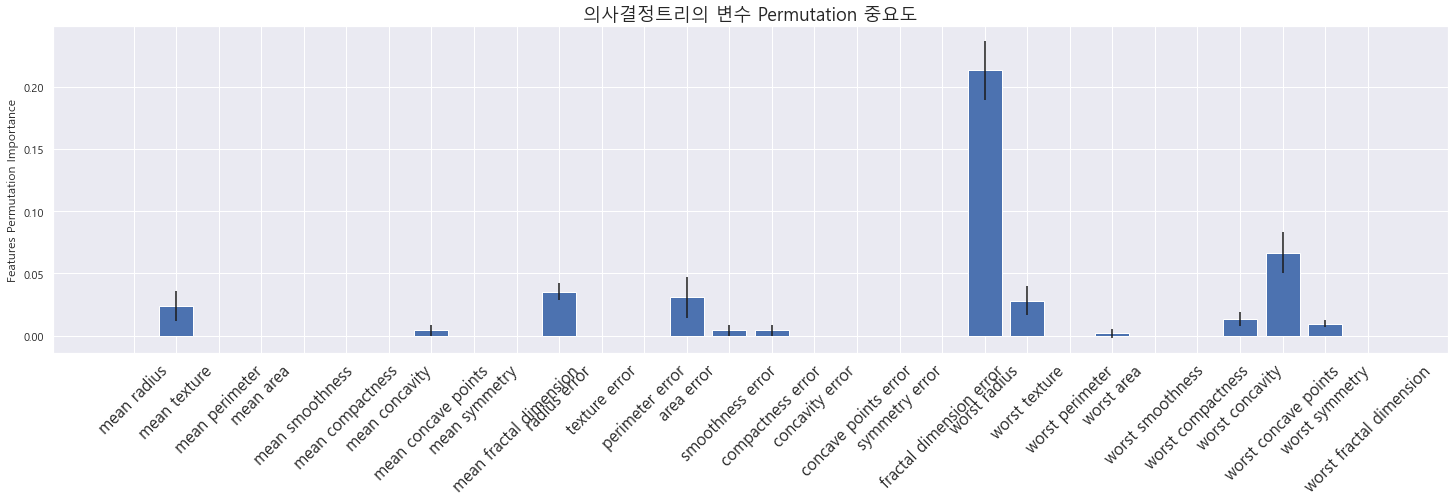

In [62]:
from sklearn.inspection import permutation_importance
result = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest_importances = pd.Series(result.importances_mean, index=feature_names)

plt.figure(figsize=(25,6)); plt.ylabel('Features Permutation Importance')
plt.title('의사결정트리의 변수 Permutation 중요도', fontsize=18)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45', fontsize=16)
plt.bar(range(X.shape[1]), forest_importances, yerr=result.importances_std, color='b')

## Hyperparametr Tunining

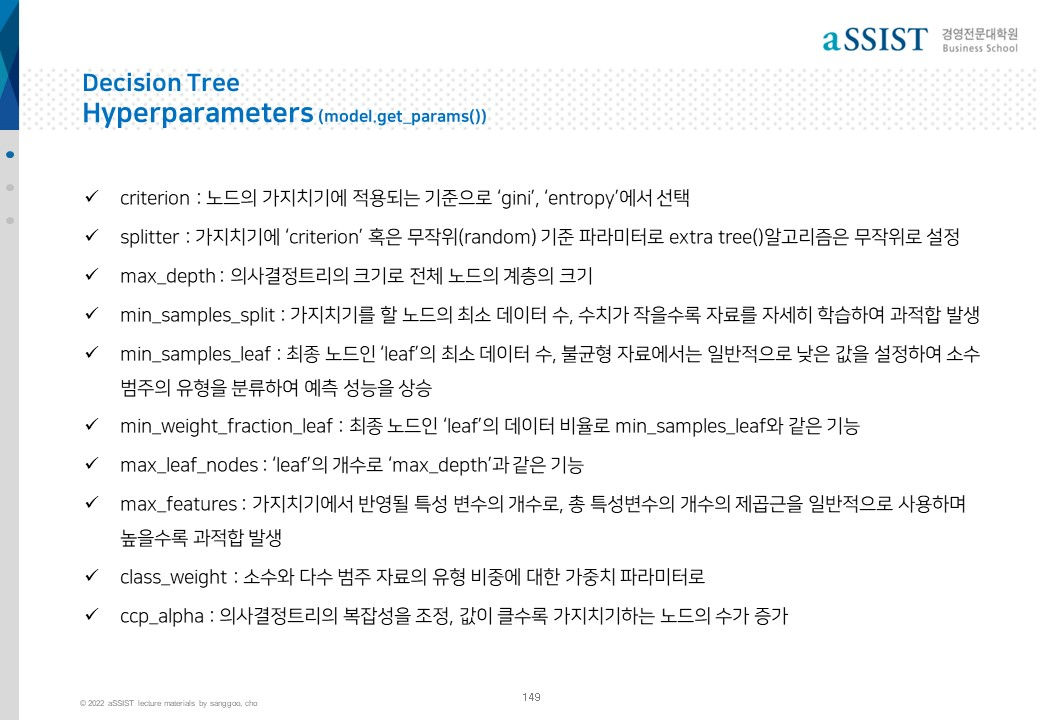

In [63]:
Image(filename=dir_path +'/슬라이드149.jpg', width=width, height=height)

In [64]:
params = {
    'criterion' :['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : np.arange(1,15),
    'min_samples_split': np.arange(0.005, 0.1, 0.001),
    'min_samples_leaf': [0.005, 0.01, 0.05, 0.10], # np.arange(0.005, 0.1, 0.001)
    'max_features': ['auto', 'sqrt', 'log2'],
}

np.random.seed(1111)
kf = KFold(n_splits=2)
model = DecisionTreeClassifier(random_state=11)
grid = RandomizedSearchCV(model, params, cv=kf, n_iter=50, 
                          scoring = 'recall_macro', verbose =True)
grid.fit(X_train, y_train)
print(f'optimal parameter: {grid.best_params_}')

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=11), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.005, 0.01, 0.05,
                                                             0.1],
                                        'min_samples_split': array([0.005,...
       0.05 , 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058,
       0.059, 0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067,
       0.068, 0.069, 0.07 , 0.071, 0.072, 0.073, 0.074, 0.075, 0.076,
       0.077, 0.078, 0.079, 0.08 , 0.081, 0.082, 0.083, 0.084, 0.085,
       0

optimal parameter: {'splitter': 'best', 'min_samples_split': 0.01, 'min_samples_leaf': 0.01, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [65]:
print('optimal parameter: {}'.format(grid.best_params_))

optimal parameter: {'splitter': 'best', 'min_samples_split': 0.01, 'min_samples_leaf': 0.01, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


### 사용자 정의함수의 일반 인자(*arg)와 키워드 인자(**kwarg)를 사용
- 사용자정의함수 괄호 안의 인자는 사전에 인자를 정하지 않는 경우
- 일반 인자(*arg)와 달리 키워드 인자(**kwarg)는 파이썬의 사전(dictionary)자료 형태인 key와 value를 아는 경우이다

In [66]:
def catch_all(*args, **kwargs):
    print("args =", args)
    print("kwargs =", kwargs)

catch_all(1, 2, 3, 4, a=7, b=5)

args = (1, 2, 3, 4)
kwargs = {'a': 7, 'b': 5}


In [67]:
catch_all('a',keyword=2)

args = ('a',)
kwargs = {'keyword': 2}


In [68]:
catch_all(**{'keyword': 3, 'name': 'ancestor9'})

args = ()
kwargs = {'keyword': 3, 'name': 'ancestor9'}


In [69]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

In [70]:
best_params = grid.best_params_
tuned_params = {item[:]: best_params[item] for item in best_params}
tuned_params

{'splitter': 'best',
 'min_samples_split': 0.01,
 'min_samples_leaf': 0.01,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=0.01, min_samples_split=0.01,
                       random_state=11)

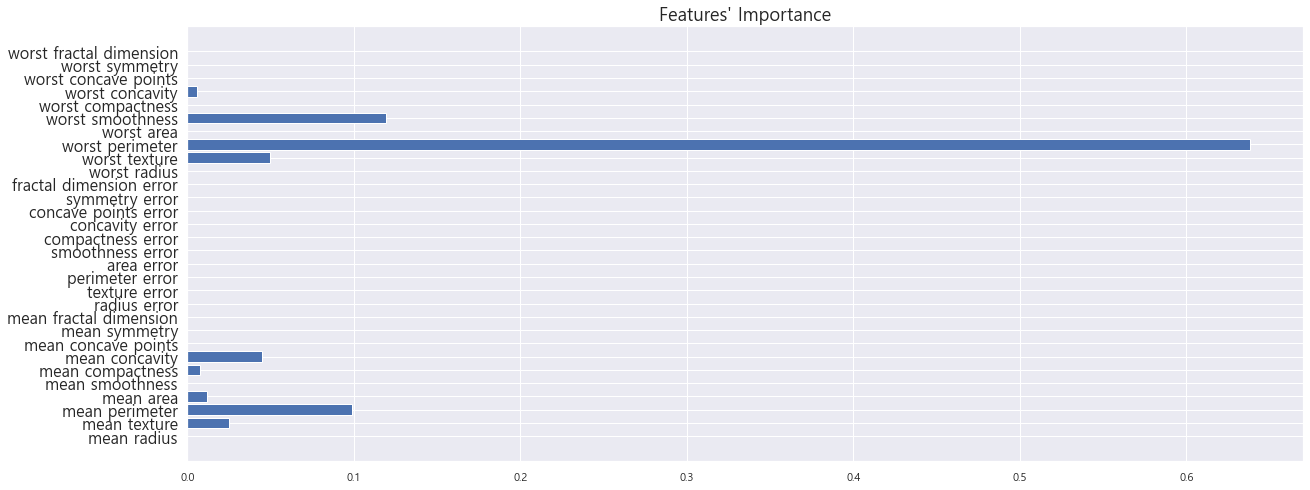

In [71]:
import os
os.makedirs('../figures/', exist_ok=True)
model= DecisionTreeClassifier(random_state=11).set_params(**grid.best_params_)
model.fit(X_train, y_train)

def plot_feature_importances(model):
    fig, ax = plt.subplots(1,1,figsize=(20,8))
    plt.barh(range(X_train.shape[1]), model.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), X_train.columns, fontsize=16)
    plt.title("Features' Importance", fontsize=18)
    plt.savefig('../figures/Feature_importance') 
    
plot_feature_importances(model)

In [72]:
import os
os.makedirs('../data/', exist_ok=True)
os.makedirs('../working/', exist_ok=True)
os.makedirs('../output/', exist_ok=True)

In [73]:
from joblib import dump, load
dump(model, '../output/dt.joblib')

['../output/dt.joblib']

In [74]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.92      0.92      0.92        72

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



### Overfitting을 방지

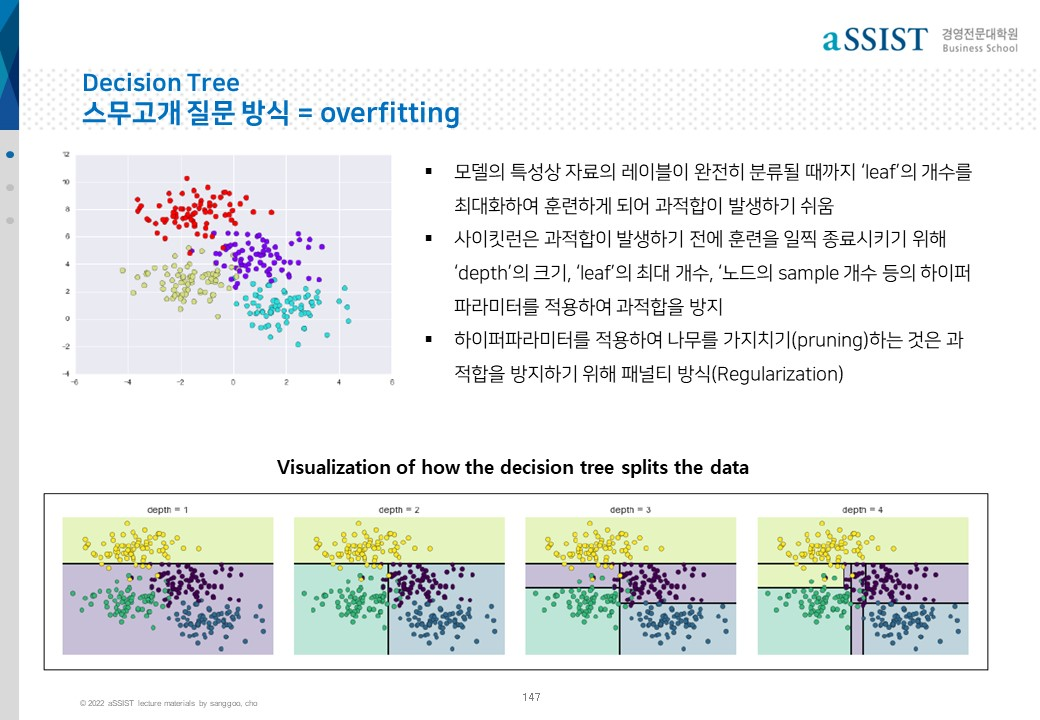

In [75]:
Image(filename=dir_path +'/슬라이드147.jpg', width=width, height=height)

# 무작위 방식의 장점 (beautiful randomness)

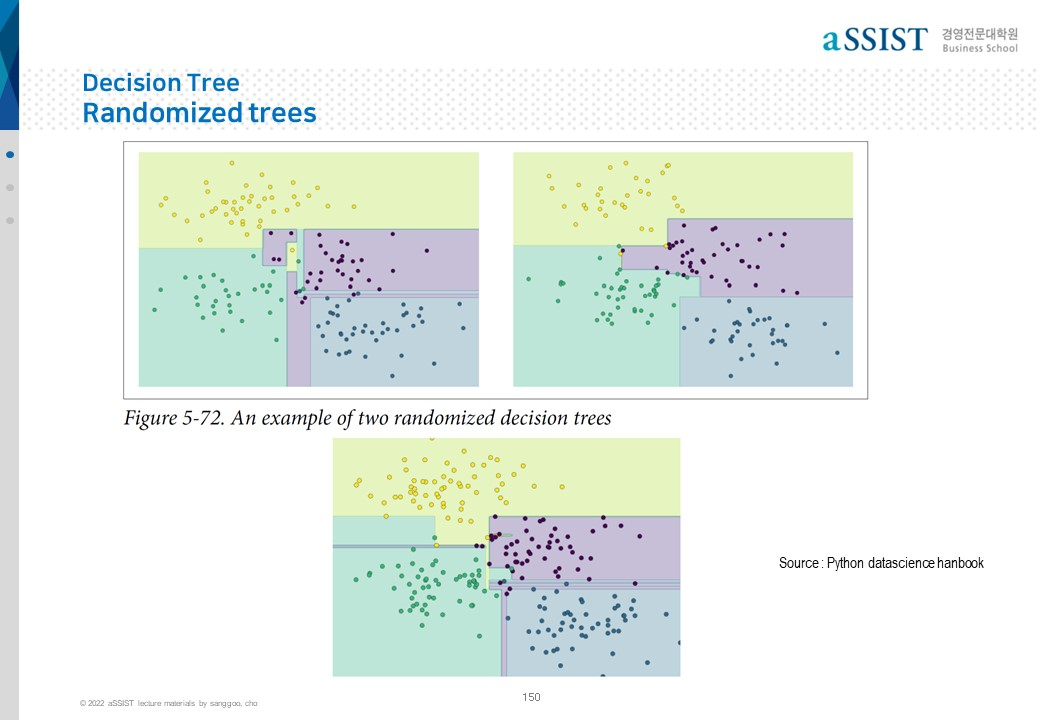

In [76]:
Image(filename=dir_path +'/슬라이드150.jpg', width=width, height=height)

## 앙상블(Ensemble)

### One week, Many strong
- Condorcet's jury theorem is a political science theorem about the relative probability of a given group of individuals arriving at a correct decision. The theorem was first expressed by the Marquis de Condorcet in his 1785 work Essay on the Application of Analysis to the Probability of Majority Decisions.

- The assumptions of the simplest version of the theorem are that a group wishes to reach a decision by majority vote. One of the two outcomes of the vote is correct, and each voter has an independent probability p of voting for the correct decision. The theorem asks how many voters we should include in the group. The result depends on whether p is greater than or less than 1/2: 
- https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem

### 30개의 의사결정 트리를 데이터에 병렬로 학습
- 상식을 가진 일반인 집단이 서로 독립적인 의사결정을 하게 되면 전문가 1명의 의사결정보다 항상 올바른 결정을 하게 된다. (집단지성)

<Figure size 1080x432 with 0 Axes>

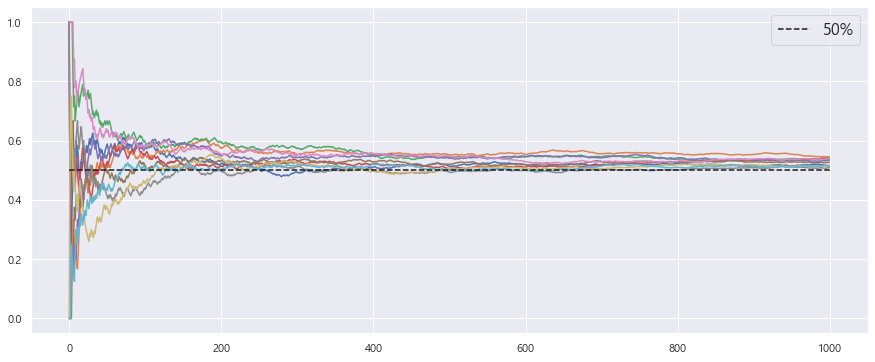

In [77]:
jurors_proba = 0.53
num_jurors = 10; num_trals = 1000
num_decisions=(np.random.rand(num_trals, num_jurors)<jurors_proba)*1
total_trials = np.arange(1, num_trals+1).reshape(-1, 1)
cum_right_ratio=np.cumsum(num_decisions, axis=0)/total_trials
plt.figure(figsize=(15,6)); plt.plot(cum_right_ratio)
plt.plot([0, num_trals], [0.5, 0.5], 'k--', label='50%')
plt.legend()

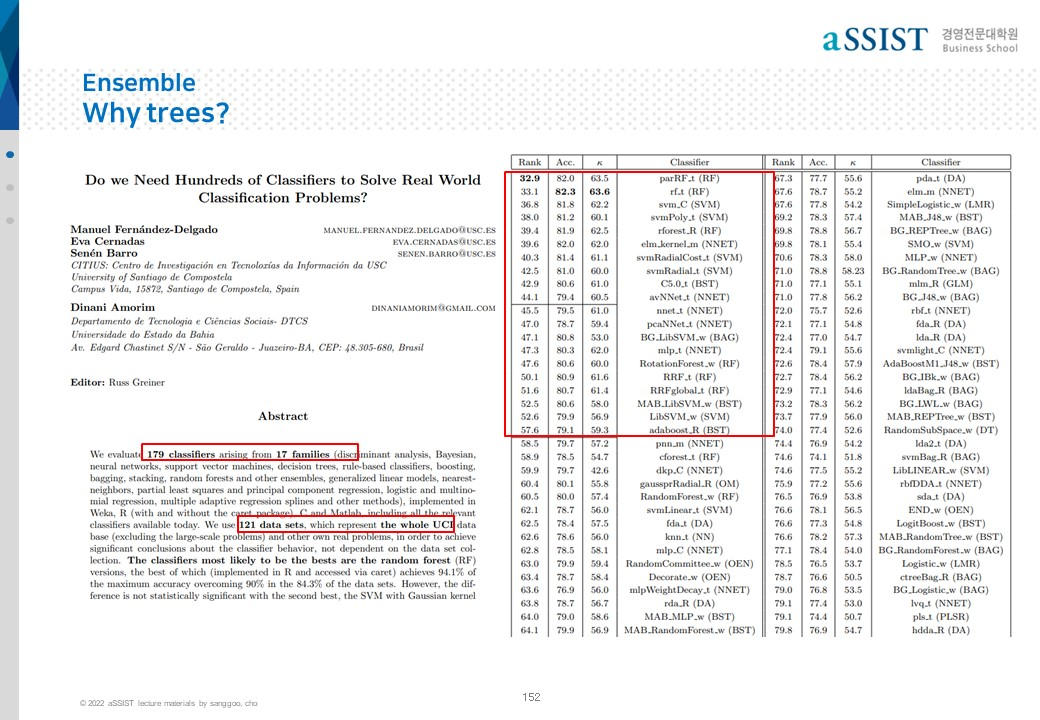

In [78]:
Image(filename=dir_path +'/슬라이드152.jpg', width=1000, height=1000)

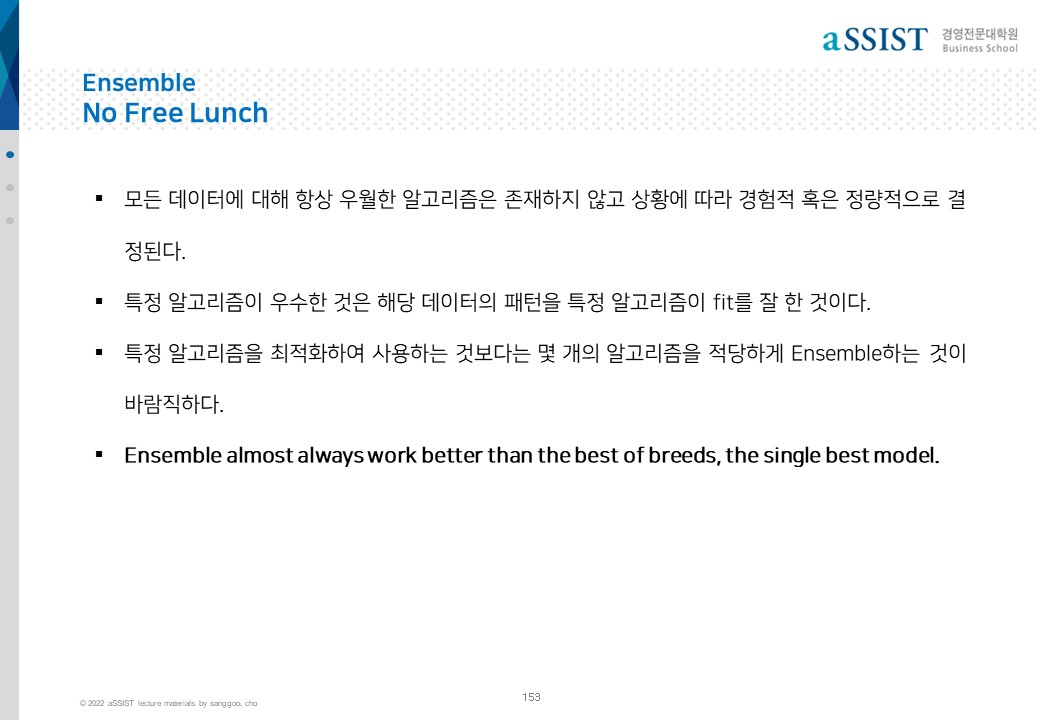

In [79]:
Image(filename=dir_path +'/슬라이드153.jpg', width=width, height=height)

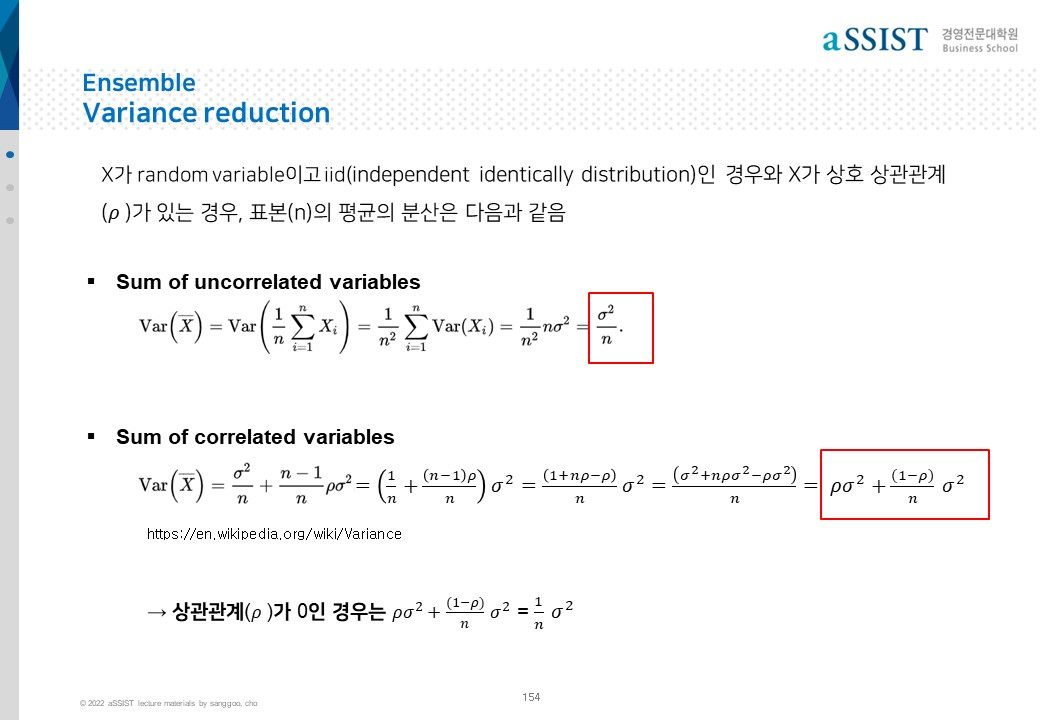

In [80]:
Image(filename=dir_path +'/슬라이드154.jpg', width=width, height=height)

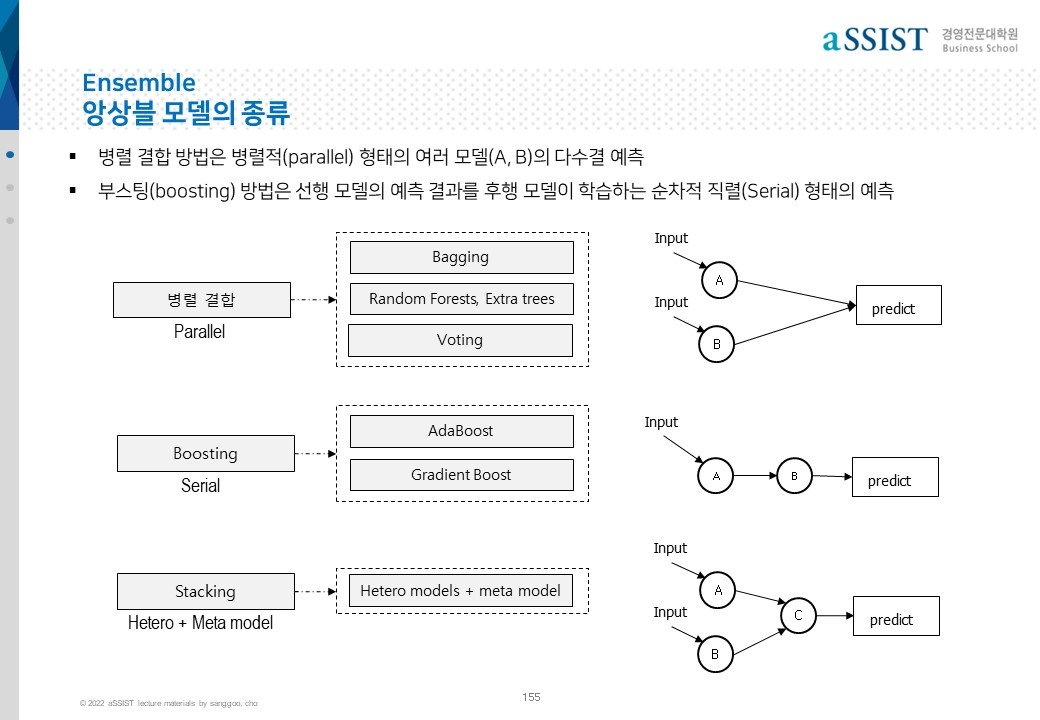

In [81]:
Image(filename=dir_path +'/슬라이드155.jpg', width=width, height=height)

## Bagging(Bootstrapping aggregation) 알고리즘

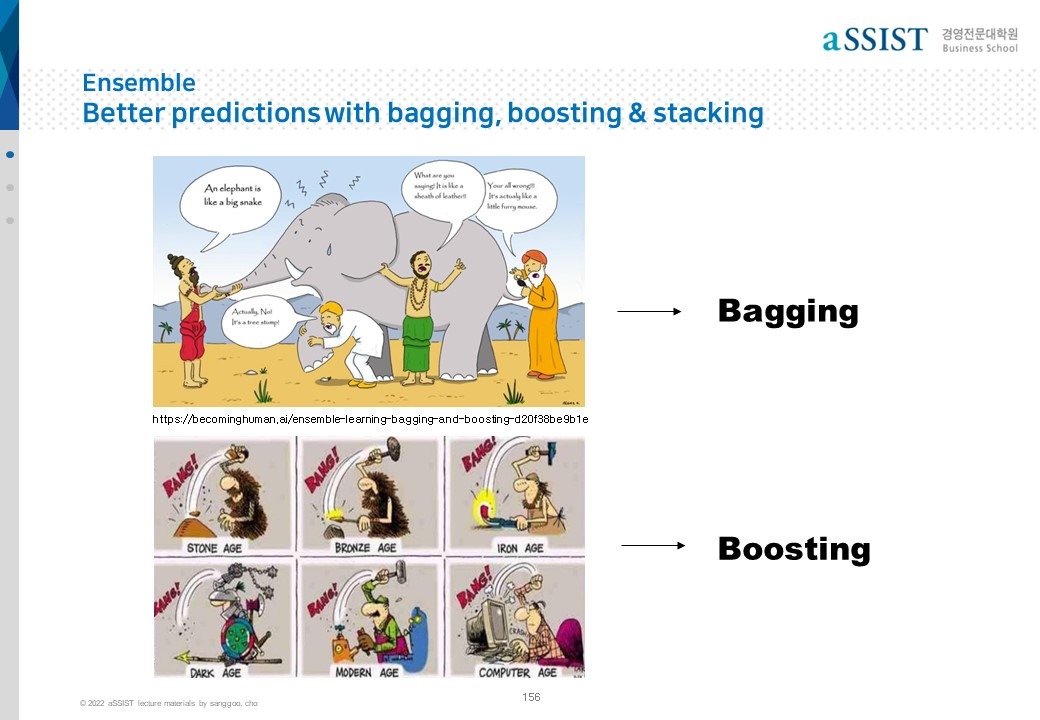

In [82]:
Image(filename=dir_path +'/슬라이드156.jpg', width=width, height=height)

## Bootstraping 
- 모집단은 (1,2,3,... 9999, 1000), 
- 표본수 100개
- 재표본 수 100개로 복원 추출 500회 부트스트래핑

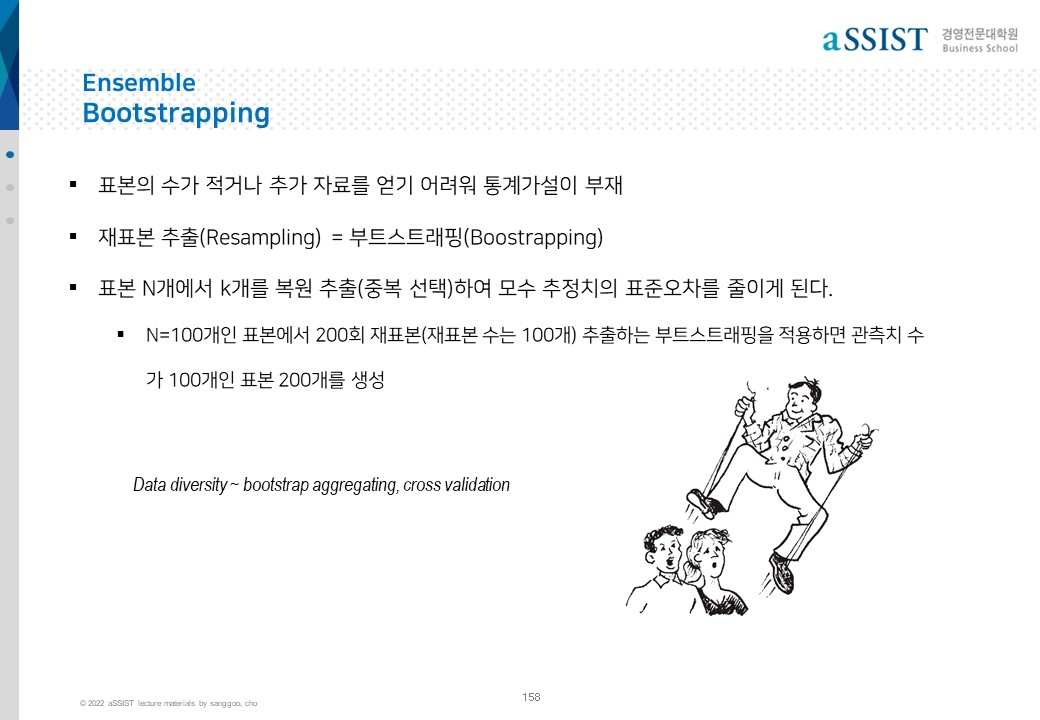

In [83]:
Image(filename=dir_path +'/슬라이드158.jpg', width=width, height=height)

In [84]:
population = np.arange(1, 10000)
sample = np.random.choice(population, 100)
bootstrap=[]
for i in range(1,500): # 500회 재표본
    trial = np.random.choice(sample, size=len(sample), replace=True) # 100개 에서 100개 추출
    bootstrap.append(trial)
pd.DataFrame(bootstrap).tail()

0     1     2     3     4     5     6     7     8     9   ...    90  \
494  6898  7852  9539  7676  1871  4255  7715  2284  1865  5402  ...  2575   
495  1315  7715  7792  4368  5880  9381  1457  4668  5183  6091  ...  2266   
496  7676  5075  8194   325  4269  4027  5630  4787  1457   113  ...  5075   
497  9539  2048  1438  5124  3851  5763  5630  6758  4547  4668  ...  5499   
498  7953  5639   325  3936  9196  3645  1342  8042  1319  7852  ...  5499   

       91    92    93    94    95    96    97    98    99  
494  7141  9666  1437  2284  1136  1457   983  6151  9023  
495  2284  6510  2809  3716  1618  4014  9539  1552  1798  
496  9023  6902  5880  8410  3851  3936  4079  3700  1552  
497  1136  2054  1457   113  1798  3404  5183  2048  5282  
498  1502  3237  4787  5124  4668  5402  9196  8042  3700  

[5 rows x 100 columns]

In [85]:
np.mean(population)
np.mean(sample)
pd.DataFrame(bootstrap).mean().mean()

5000.0

4693.11

4699.105891783569

## 중심극한 정리(Central limit theorem)
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/800px-IllustrationCentralTheorem.png'>

<AxesSubplot:>

Text(0.5, 1.0, 'Bootstrapping과 중심극한 정리(Central limit theorem)')

Text(0.5, 0, '500회 bootstrapping의 각 평균값')

- Bootstrapping 10,000회에도 한번도 선택되지 못할 확률: 0.36786104643297046
- 자연로그 밑의 오일러 지수의 역수: 0.36787944117144233


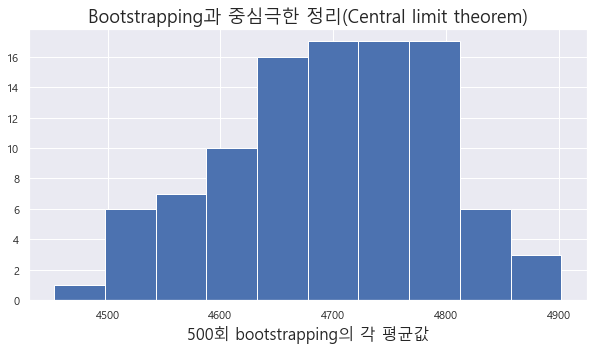

In [86]:
pd.DataFrame(bootstrap).mean().hist(figsize=(10,5))
plt.title('Bootstrapping과 중심극한 정리(Central limit theorem)', fontsize=18)
plt.xlabel('500회 bootstrapping의 각 평균값', fontsize=16)
print(f'- Bootstrapping 10,000회에도 한번도 선택되지 못할 확률: {(1-1/10000)**10000}')
print(f'- 자연로그 밑의 오일러 지수의 역수: {1/np.e}')

In [87]:
(1-1/10000)**10000

0.36786104643297046

## Bagging, Depth가 '1'인 500개의 Stump로 예측

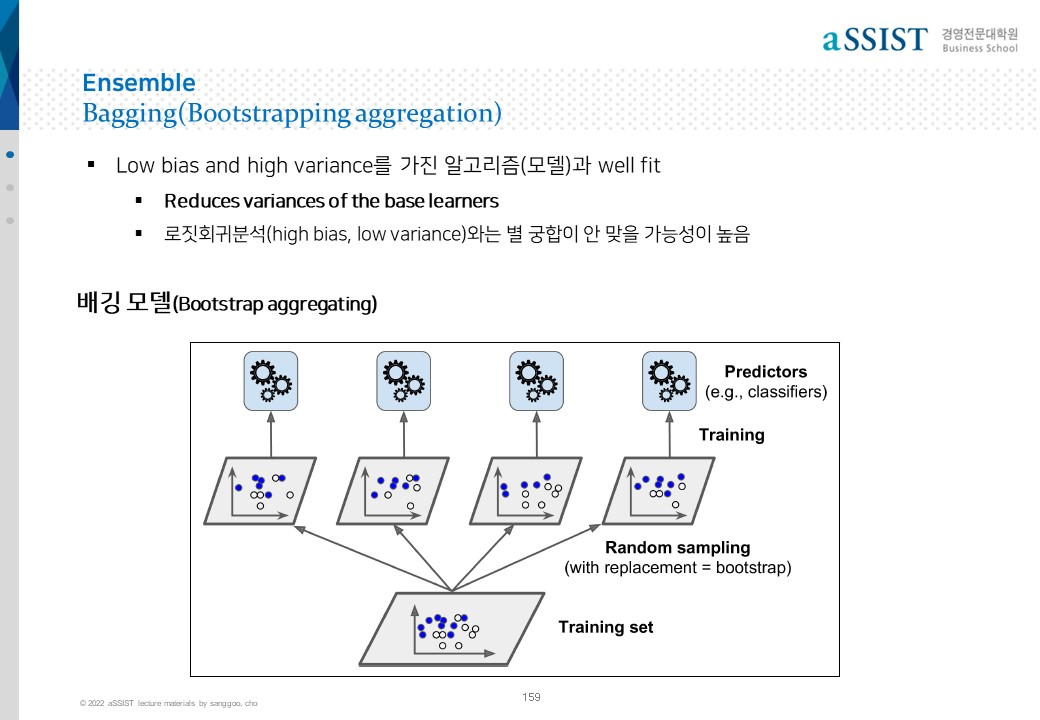

In [88]:
Image(filename=dir_path +'/슬라이드159.jpg', width=width, height=height)

In [89]:
from sklearn import ensemble 
stump= DecisionTreeClassifier(max_depth=1, random_state=1357)
bag = ensemble.BaggingClassifier(stump, n_estimators = 500, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.868421052631579

              precision    recall  f1-score   support

           0       0.94      0.69      0.79        42
           1       0.84      0.97      0.90        72

    accuracy                           0.87       114
   macro avg       0.89      0.83      0.85       114
weighted avg       0.88      0.87      0.86       114



### Booststrapping

In [90]:
from sklearn import ensemble 
np.random.seed(1357) 
dt = DecisionTreeClassifier(random_state=11)
bag = ensemble.BaggingClassifier(dt, n_estimators = 30, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.9649122807017544

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



## Random Forest 알고리즘
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

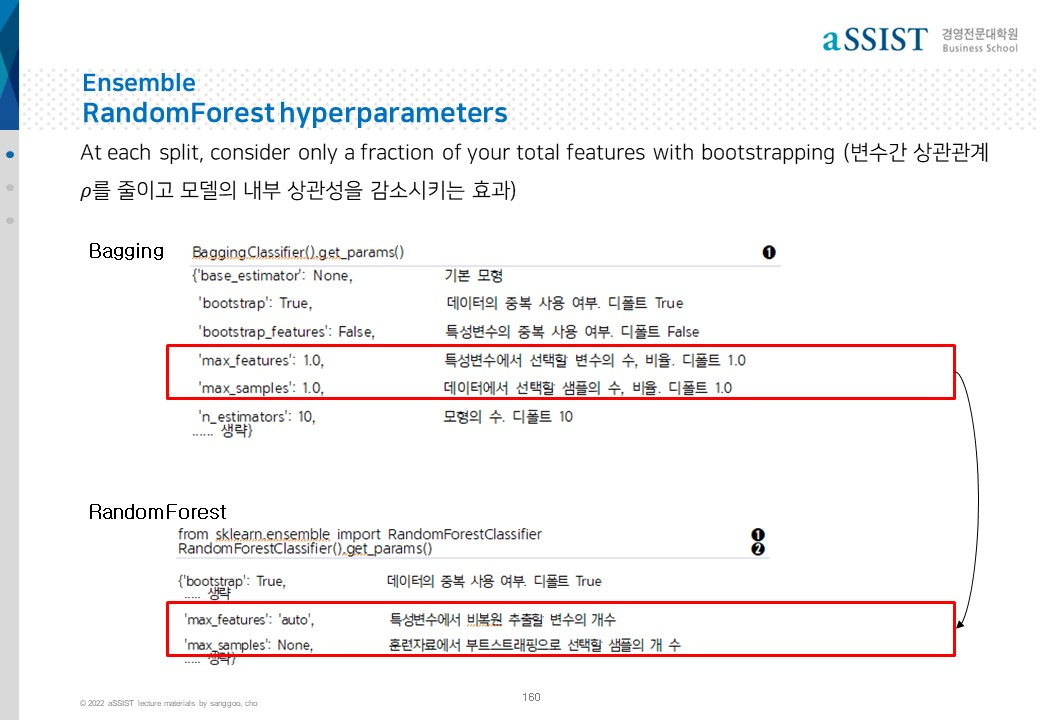

In [91]:
Image(filename=dir_path +'/슬라이드160.jpg', width=width, height=height)

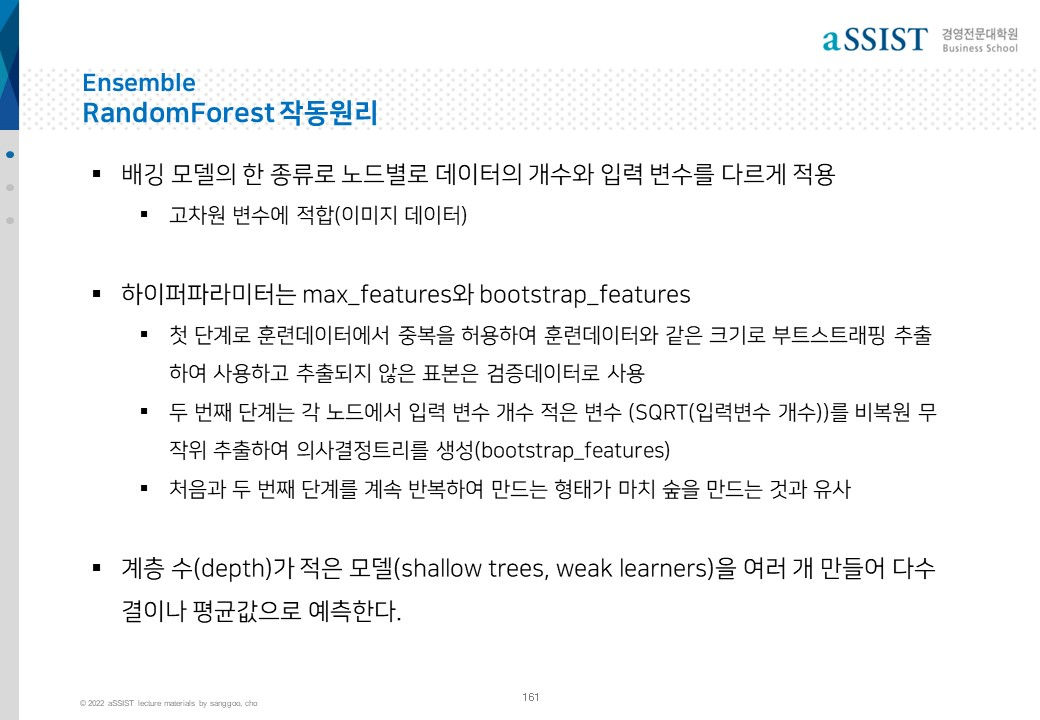

In [92]:
Image(filename=dir_path +'/슬라이드161.jpg', width=width, height=height)

In [93]:
X_train.shape

(455, 30)

In [94]:
np.arange(2, 20 ,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [95]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, 10)]
min_samples_split = np.arange(2, 30, 2)
min_samples_leaf = np.arange(2, 50, 2)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [96]:
from sklearn.metrics import roc_auc_score, average_precision_score
np.random.seed(4321)
rf = ensemble.RandomForestClassifier(random_state=11)
rf_random = RandomizedSearchCV(rf, random_grid, cv=kf, scoring = 'recall')
y_predict = rf_random.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
y_proba = rf_random.predict_proba(X_test)
print(f'정확도(accuracy): {accuracy_score(y_test, y_predict)}')
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

정확도(accuracy): 0.9473684210526315
AUROC: 0.9735449735449735
AP: 0.9747058887799015


### Randomforest OOB Error(Out of Bag Error) with bootstrapping(부트스트래핑) 

In [97]:
n = 100000
trials = 100000
print(f'1 회 비복원추출시 뽑힐 확률은 {1/n}')
print(f'1 회 비복원추출시 안 뽑힐 확률은 {(1-1/n)}')
print(f'{trials}번 비복원 추출시 계속 안 뽑힐 확률은 {(1-1/n)**trials}')

import math
math.e
1/math.e

1 회 비복원추출시 뽑힐 확률은 1e-05
1 회 비복원추출시 안 뽑힐 확률은 0.99999
100000번 비복원 추출시 계속 안 뽑힐 확률은 0.3678776017682465


2.718281828459045

0.36787944117144233

In [98]:
rf = ensemble.RandomForestClassifier(n_estimators=300, oob_score=True,
                                     max_features='sqrt', random_state=11)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Mean accuracy score: {accuracy:.3}')
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')

RandomForestClassifier(max_features='sqrt', n_estimators=300, oob_score=True,
                       random_state=11)

Mean accuracy score: 0.965
Out-of-bag score estimate: 0.952


RandomForestClassifier(max_features='sqrt', n_estimators=1, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=1, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=2, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=2, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=3, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=3, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=4, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=4, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=5, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=5, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=6, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=6, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=7, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=7, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=8, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=8, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=9, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=9, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=10, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=10, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=11, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=11, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=12, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=12, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=13, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=13, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=14, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=14, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=11, warm_start=True)

(1.0, 50.0)

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'OOB error rate')

Text(0.5, 1.0, 'Randomforest with max_features= sqrt')

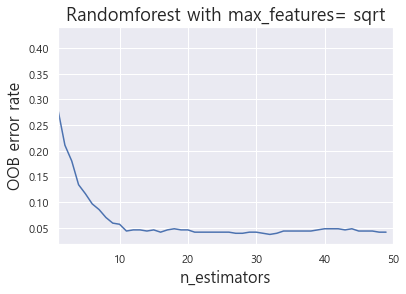

In [99]:
min_estimators = 1; max_estimators = 50
clf = ensemble.RandomForestClassifier(warm_start=True, oob_score=True,
                                      max_features='sqrt', random_state=11)
oob_error_list =[]
for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)
    oob_error = 1 - clf.oob_score_
    oob_error_list.append(oob_error)

plt.plot(oob_error_list)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators", fontsize=16); plt.ylabel("OOB error rate", fontsize=16)
plt.title('Randomforest with max_features= sqrt', fontsize=18)

### What is warm start?

In [100]:
from sklearn.linear_model import SGDRegressor
np.random.seed(0)

X = np.linspace(-1, 1, num=50).reshape(-1, 1); X.shape
Y = (X*3.3 + 5.6).reshape(50,); y.shape

(50, 1)

(569,)

- sgd_reg_model_cold : 첫번째 fitting과 두번째 fitting 때의 coefficient가 같음
- sgd_reg_model_warm : 이 전에 학습했던 것을 따뜻하게 기억하여 첫번째 fitting할 때와 두번째 fitting할 때의 coefficient가 다름

In [101]:
sgd_reg_model_cold = SGDRegressor(random_state=0, verbose=0, 
                                  warm_start=False, 
                                  max_iter=10)

sgd_reg_model_cold.fit(X, Y)
print(f"First  fitting ---- Coefficient: {sgd_reg_model_cold.coef_}")
sgd_reg_model_cold.fit(X, Y)
print(f"Second fitting ---- Coefficient: {sgd_reg_model_cold.coef_}")

SGDRegressor(max_iter=10, random_state=0)

First  fitting ---- Coefficient: [1.26229792]


SGDRegressor(max_iter=10, random_state=0)

Second fitting ---- Coefficient: [1.26229792]


In [102]:
sgd_reg_model_warm = SGDRegressor(random_state=0, verbose=0, 
                                  warm_start=True, 
                                  max_iter=10)

sgd_reg_model_warm.fit(X, Y)
print(f"First  fitting ---- Coefficient: {sgd_reg_model_warm.coef_}")
sgd_reg_model_warm.fit(X, Y)
print(f"Second fitting ---- Coefficient: {sgd_reg_model_warm.coef_}")

SGDRegressor(max_iter=10, random_state=0, warm_start=True)

First  fitting ---- Coefficient: [1.26229792]


SGDRegressor(max_iter=10, random_state=0, warm_start=True)

Second fitting ---- Coefficient: [2.04389939]


### 랜덤포레스트의 무작위성(Non-paremetric model)
- 빈 리스트를 만들고 랜덤시드를 서로 다르게 50회 반복하여 훈련과 검증데이터를 만들어 종속변수의 범주 유형 비율의 차이를 그림으로 확인한다. 
- 랜덤 시드가 달라지면 훈련과 검증데이터의 범주 유형 비율이 달라진다는 것을 알 수 있다.
- Non-parametric 통계모델

## Data obtain again

빈 리스트를 만들고 반복문으로 랜덤시드를 무작위로 100회 추출하여 모델을 랜덤 시드와 같이 객체화하고 학습 예측하여 100개 모델의 정확도를 확인한다.
- 훈련과 검증데이터가 같고 랜덤포레스트 모델에 랜덤시드를 설정하여도 모델의 정확도는 달라진다.
- 100회 학습한 모델의 정확도를 확인하면 랜덤시드별로 정확도는 달라진다. (비모수 통계)

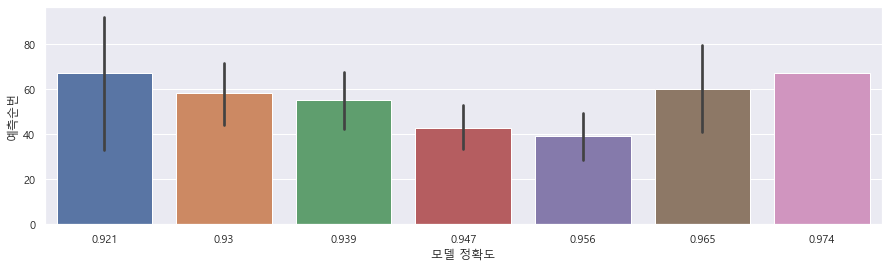

In [103]:
acc_list = []
for i in np.random.choice(2500, 100, replace=False) :
    clf = ensemble.RandomForestClassifier(n_estimators = 5, random_state = i) 
    preds =  clf.fit(X_train, y_train).predict(X_test)  
    acc = round(accuracy_score(y_true = y_test, y_pred = preds), 3)
    acc_list.append(acc)

data = (pd.Series(acc_list).reset_index().
        rename(columns={'index': '예측순번', 0: '모델 정확도'}))
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax = sns.barplot(x='모델 정확도', y='예측순번', data=data)

### Model Interpretability_3. 특성변수 영향도(partial dependence)

- 사이킷런의 featu#re importance와 permutation importance는 예측에 영향을 미치는 상대적 중요도를 나타낸다. 
- pdp는 예측 확률에 어떻게 영향을 미치는지를 보여준다. 
- 전체 입력변수의 상대적인 중요도가 아닌 개별 변수의 민감도

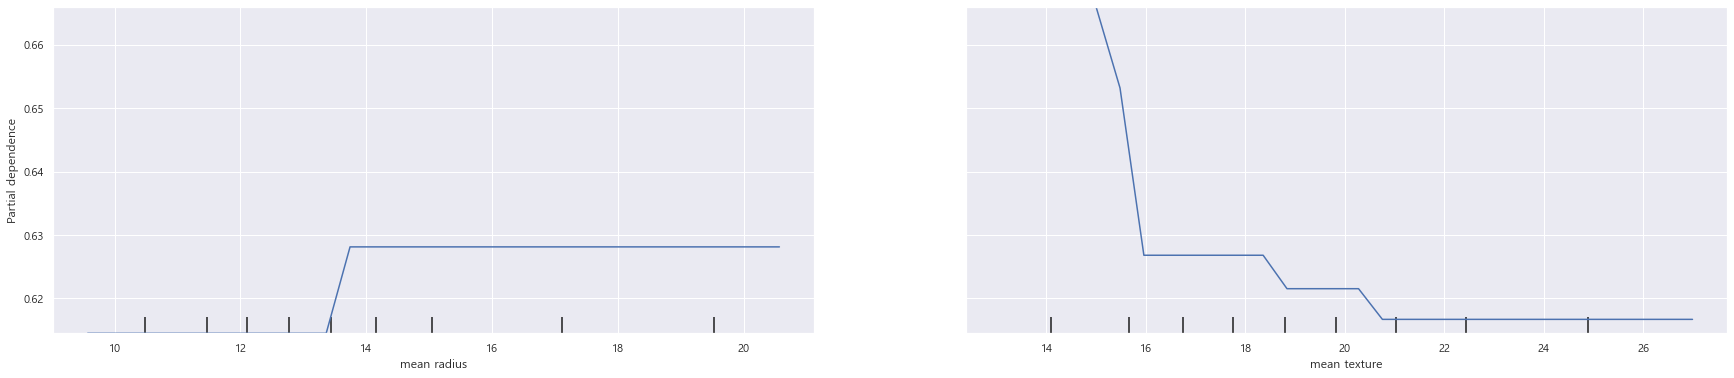

In [104]:
from sklearn.inspection import plot_partial_dependence
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['figure.figsize'] = (30,6)
features = ['mean radius', 'mean texture']
plot_partial_dependence(clf, X_train, features, n_jobs=3, grid_resolution=30)
fig = plt.gcf(); fig.subplots_adjust(hspace=2)

## Data obtain once again

In [105]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns= data.feature_names)
y = pd.Series(data.target)

In [106]:
extree = ensemble.ExtraTreesClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10)
y_predict = extree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
y_proba = rf_random.predict_proba(X_test)
print(f'정확도(accuracy): {accuracy_score(y_test, y_predict)}')
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')

array([0.98245614, 0.87719298, 0.94736842, 0.96491228, 0.96491228,
       0.94736842, 0.94736842, 0.98245614, 0.98245614, 0.96428571])

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

정확도(accuracy): 0.956140350877193
AUROC: 0.9735449735449735
AP: 0.9747058887799015


## Random Forest Regression

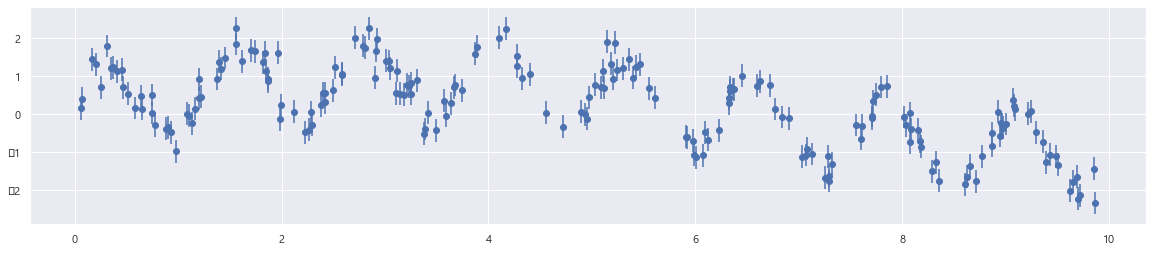

In [107]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def data_generator(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise
y = data_generator(x)
plt.figure(figsize=(20, 4))
plt.errorbar(x, y, 0.3, fmt='o');

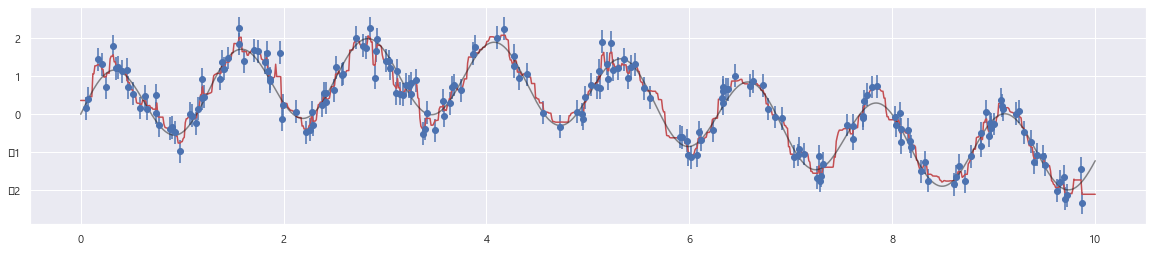

In [108]:
forest = ensemble.RandomForestRegressor(200)
forest.fit(x[:, None], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = data_generator(xfit, sigma=0)
plt.figure(figsize=(20, 4))
plt.errorbar(x, y, 0.3, fmt='o', alpha=1)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

## Extreme randomness, Extra trees

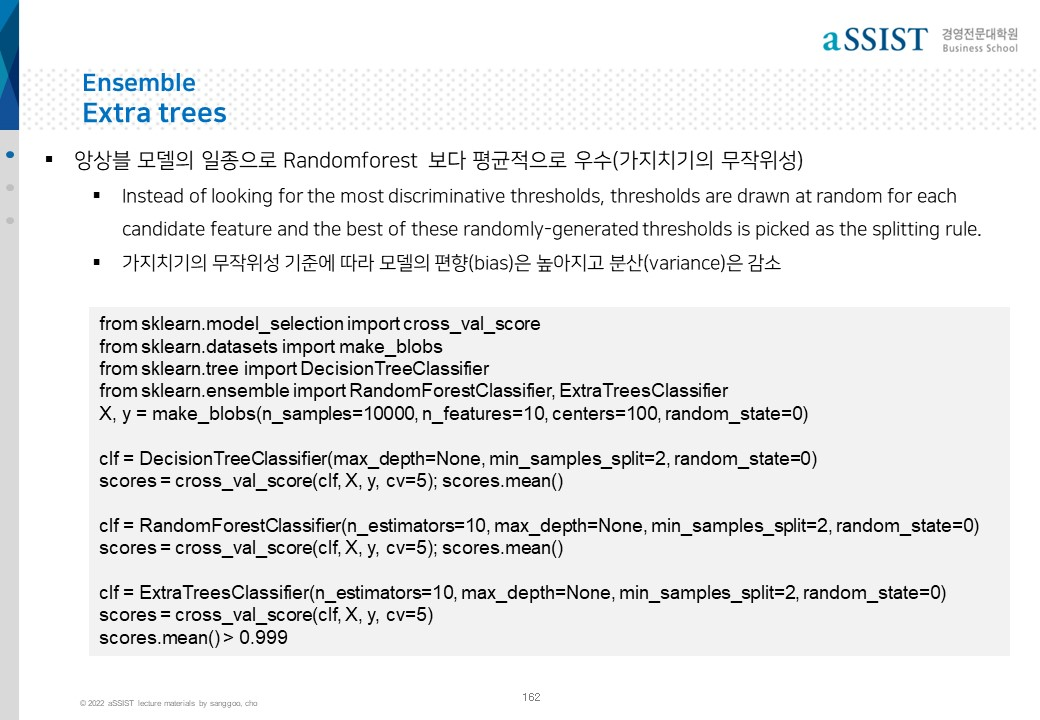

In [109]:
Image(filename=dir_path +'/슬라이드162.jpg', width=width, height=height)

## VotingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

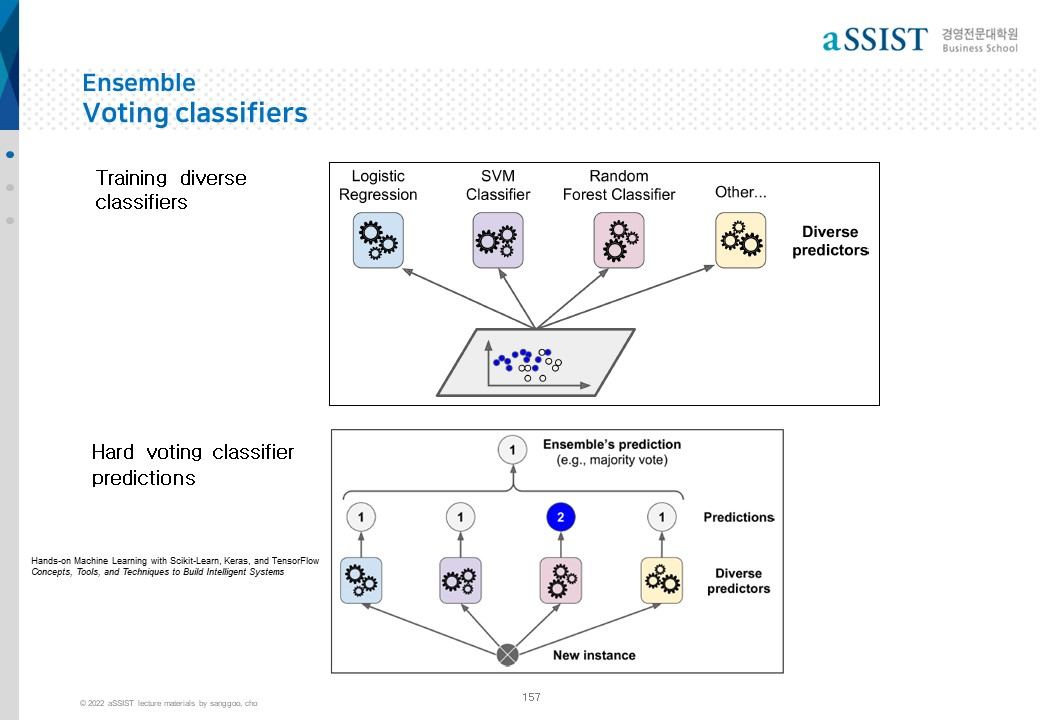

In [110]:
Image(filename=dir_path +'/슬라이드157.jpg', width=width, height=height)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
estimators=[('lgr', LogisticRegression(solver='saga', class_weight='balanced')),
            ('rf',  ensemble.RandomForestClassifier(class_weight='balanced')),
            ('gnb', GaussianNB())]
eclf = ensemble.VotingClassifier(estimators, voting='soft')

params = {
    'lgr__C': [0.01, 0.1, 1, 10], 'lgr__penalty': ['l1', 'l2'], 
    'rf__n_estimators': [200], 'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [3, 4, 5, 6, 7, 8], 'rf__criterion' :['gini', 'entropy'],
    'gnb__var_smoothing': [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
}

In [112]:
kf = KFold(n_splits=5)
grid = RandomizedSearchCV(eclf, params, cv = kf,  verbose = 1, n_iter = 5,
                          scoring = 'f1_macro')                 
y_predict = grid.fit(X_train, y_train).predict(X_test)
y_proba = grid.fit(X_train, y_train).predict_proba(X_test)
print(f'AUROC: {roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {average_precision_score(y_test, y_proba[:, 1])}')
print(classification_report(y_test, y_predict))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
AUROC: 0.9847883597883598
AP: 0.9906530681359074
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



## Boosting 모델
## Adaboosting
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

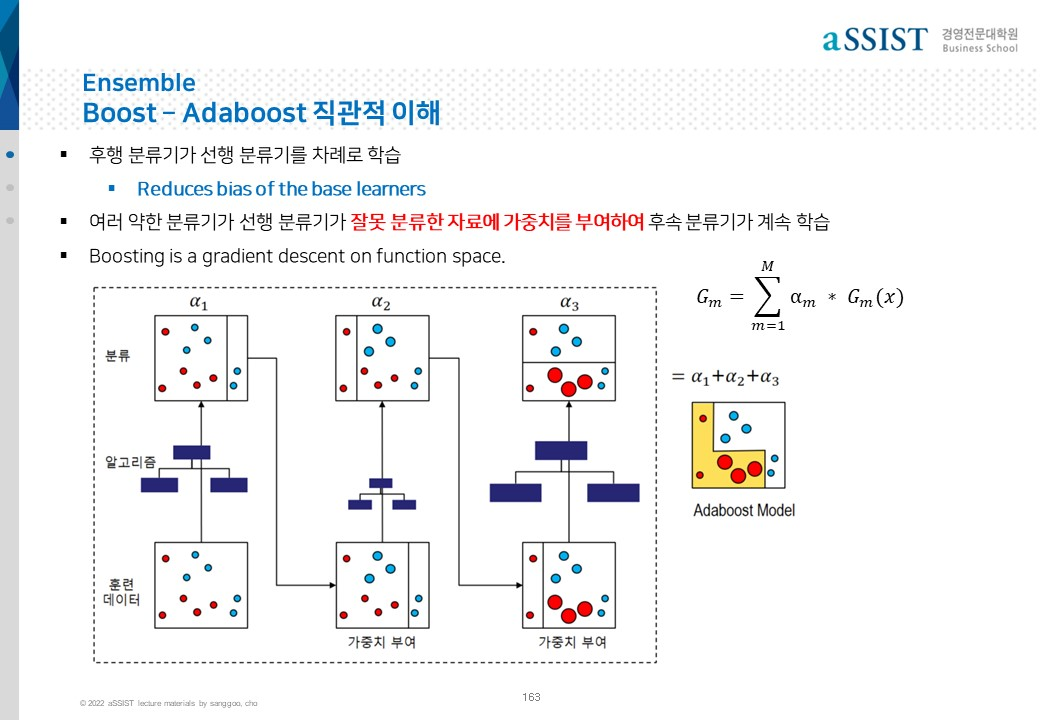

In [113]:
Image(filename=dir_path +'/슬라이드163.jpg', width=width, height=height)

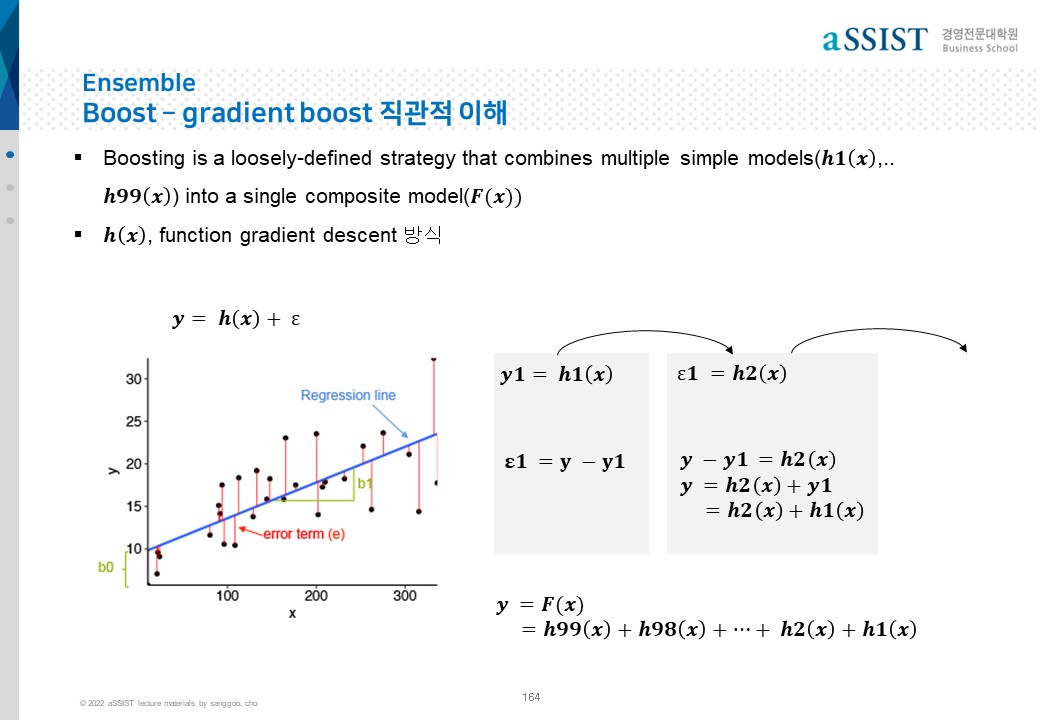

In [120]:
Image(filename=dir_path +'/슬라이드164.jpg', width=width, height=height)

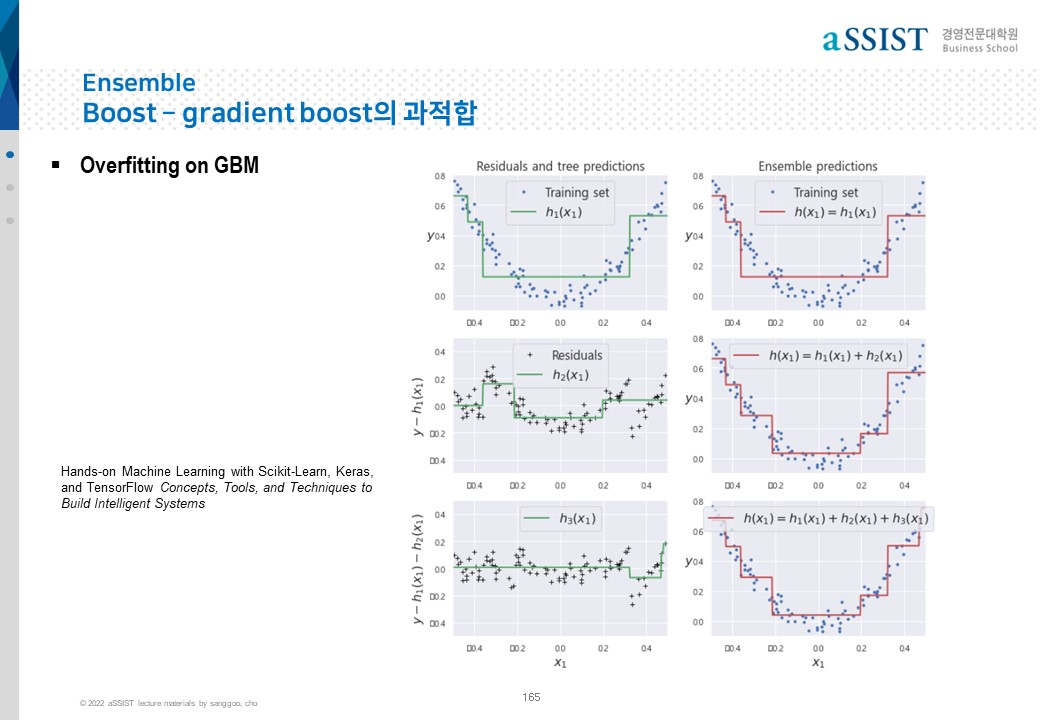

In [121]:
Image(filename=dir_path +'/슬라이드165.jpg', width=width, height=height)

In [114]:
from sklearn import tree
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5;  y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
tree_reg1 =tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
y2 = y - tree_reg1.predict(X)
tree_reg2 = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

DecisionTreeRegressor(max_depth=2, random_state=42)

DecisionTreeRegressor(max_depth=2, random_state=42)

DecisionTreeRegressor(max_depth=2, random_state=42)

array([0.75026781])

In [115]:
def plot_predictions(regressors, X, y, axes, label=None, 
                     style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

Text(0, 0.5, '$y$')

Text(0.5, 1.0, 'Residuals and tree predictions')

<AxesSubplot:>

Text(0, 0.5, '$y$')

Text(0.5, 1.0, 'Ensemble predictions')

<AxesSubplot:>

Text(0, 0.5, '$y - h_1(x_1)$')

<AxesSubplot:>

Text(0, 0.5, '$y$')

<AxesSubplot:>

Text(0, 0.5, '$y - h_1(x_1) - h_2(x_1)$')

Text(0.5, 0, '$x_1$')

<AxesSubplot:>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

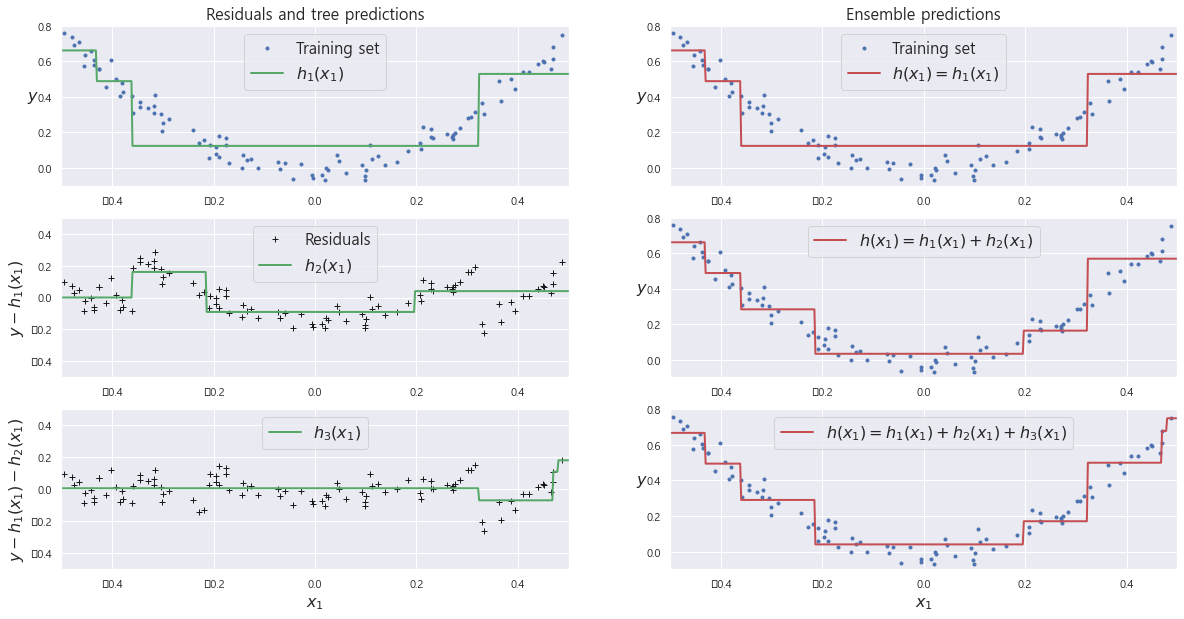

In [116]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0); plt.title("Residuals and tree predictions", fontsize=16)
plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0); plt.title("Ensemble predictions", fontsize=16)
plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)
plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16); plt.xlabel("$x_1$", fontsize=16)
plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16); plt.ylabel("$y$", fontsize=16, rotation=0)
plt.show()

## learning rate와 estimator개수

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

Text(0.5, 1.0, 'learning_rate=1.0, n_estimators=3')

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

Text(0.5, 1.0, 'learning_rate=0.1, n_estimators=200')

Text(0.5, 0, '$x_1$')

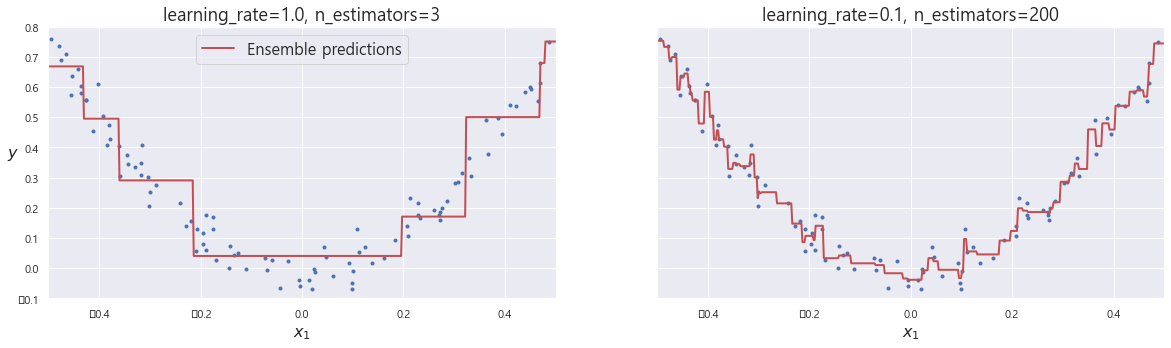

In [117]:
gbrt = ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)
gbrt_slow = ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(20,5), sharey=True)
plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title(f'learning_rate={gbrt.learning_rate}, n_estimators={gbrt.n_estimators}',fontsize=18)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title(f'learning_rate={gbrt_slow.learning_rate}, n_estimators={gbrt_slow.n_estimators}',fontsize=18)
plt.xlabel("$x_1$", fontsize=16)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=20,
                          random_state=42)

GradientBoostingRegressor(max_depth=2, n_estimators=20, random_state=42)

Text(0.5, 1.0, 'learning_rate=1.0, n_estimators=20')

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

Text(0.5, 1.0, 'learning_rate=0.1, n_estimators=20')

Text(0.5, 0, '$x_1$')

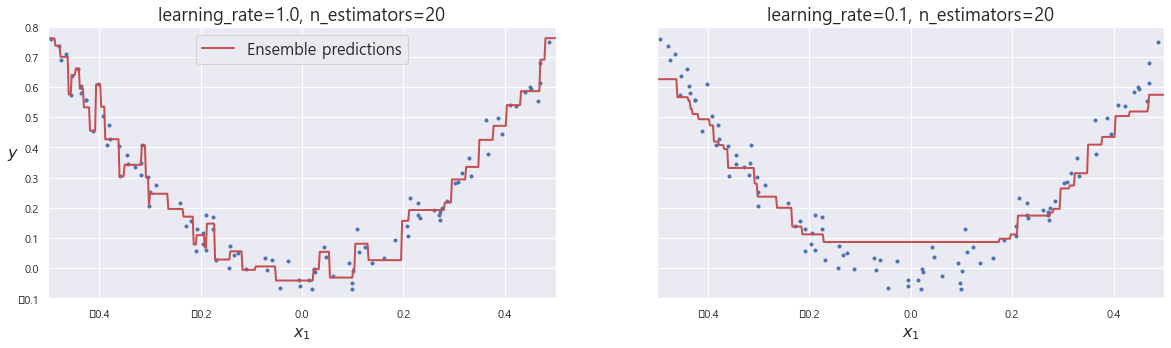

In [118]:
gbrt = ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)
gbrt_slow = ensemble.GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(20,5), sharey=True)
plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title(f'learning_rate={gbrt.learning_rate}, n_estimators={gbrt.n_estimators}',fontsize=18)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title(f'learning_rate={gbrt_slow.learning_rate}, n_estimators={gbrt_slow.n_estimators}',fontsize=18)
plt.xlabel("$x_1$", fontsize=16)

### back to 데이터

In [119]:
from sklearn import metrics
ada_clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, random_state=1357)
y_predict = ada_clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
y_probas = ada_clf.predict_proba(X_test)
metrics.log_loss(y_test, y_probas )
from sklearn.metrics import brier_score_loss
metrics.brier_score_loss(y_test, y_probas [:,1])
from sklearn.metrics import matthews_corrcoef
metrics.matthews_corrcoef(y_test, y_predict)

0.956140350877193

0.48930974252660137

0.15087438479924273

0.907605465436683

## Gradient Boosting
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

### GBM의 과적합(Overfitting)을 줄이는 방법_Regularization

#### 1. Subsample
#### 2. Shrinkage : learning rate
#### 3. Ealry stopping

### 앙상블 모델의 대표, 랜덤포레스트와 그레디언트부스팅 

In [123]:
classifiers = {}
classifiers.update({'Random Forest': ensemble.RandomForestClassifier()})
classifiers.update({'Gradient Boosting': ensemble.GradientBoostingClassifier()})
classifiers

{'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier()}

In [124]:
parameters = {}
parameters.update({'Random Forest': 
{ 
'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [int(x) for x in np.linspace(5, 20, 10)],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__criterion' :['gini', 'entropy']     ,
'classifier__n_jobs': [-1]
}})

parameters.update({'Gradient Boosting': 
{ 
'classifier__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
'classifier__n_estimators': [200],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__subsample': [0.8, 0.9, 1]
}})

In [125]:
results = {}
for classifier_label, classifier in classifiers.items():
    steps = [ ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]
    grid = RandomizedSearchCV(pipeline, param_grid, cv = kf,  n_jobs= -1,
                          n_iter = 5,
                          scoring = 'recall_macro')  
    
    y_pred = grid.fit(X_test, y_test).predict(X_test)
    y_proba = grid.fit(X_test, y_test).predict_proba(X_test)
    y_score = y_proba[:,1]
    
    print('*'*50); print('Classifier name : ', classifier_label )
    print(classification_report(y_test, y_pred))
    
    result = {#'Classifier': classifier_label,
              'Best Parameters': grid.best_params_,
              'Recall_macro': metrics.recall_score(y_test, y_pred, average='macro'),
              'AUROC' : metrics.roc_auc_score(y_test, y_score),
              'Average PR': metrics.average_precision_score(y_test, y_score),
              'F1-score': metrics.f1_score(y_test, y_pred),
              'Accuracy': metrics.accuracy_score(y_test, y_pred),
              'Log_loss': metrics.log_loss(y_test, y_proba),
              'Brier_scor': metrics.brier_score_loss(y_test, y_proba[:,1]),
              'MC': metrics.matthews_corrcoef(y_test, y_predict)
             }
    
    results.update({classifier_label: result})
    dump(grid.fit(X_train, y_train), '../output/' + classifier_label + '.joblib')

**************************************************
Classifier name :  Random Forest
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



['../output/Random Forest.joblib']

**************************************************
Classifier name :  Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        72

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



['../output/Gradient Boosting.joblib']

In [126]:
pd.DataFrame(results).T

Best Parameters  \
Random Forest      {'classifier__n_jobs': -1, 'classifier__n_esti...   
Gradient Boosting  {'classifier__subsample': 0.9, 'classifier__n_...   

                  Recall_macro    AUROC Average PR  F1-score  Accuracy  \
Random Forest         0.988095  0.99537   0.997338  0.993103  0.991228   
Gradient Boosting          1.0      1.0        1.0       1.0       1.0   

                   Log_loss Brier_scor        MC  
Random Forest      0.149338   0.035208  0.907605  
Gradient Boosting  0.000069        0.0  0.907605

## 1. learning rate에 따른 최적모델
### 1.1 약한 분류기 1,000개로 모델을 객체화하고 학습하여 로그손실을 계산하여 최소 로그손실과 해당하는 의사결정트리의 개수를 확인한다. 
- learning rate = 0.1

### 1.2 약한 분류기 1,000개로 모델을 객체화하고 학습하여 로그손실을 계산하여 최소 로그손실과 해당하는 의사결정트리의 개수를 확인한다. 
#### learning rate = 0.5로 하면 의사결정 트리가 줄어든다

## 조기 종료(Early stopping)
- 1,000개의 분류기를 모두 실행하지 않고 5번에 걸친 학습 결과에도 로그 손실이 개선되지 않으면 학습을 중단시킬 수 있다. 
- 하이퍼파라미터를 ‘warm_start=True’라고 지정하여 선행 모델의 파라미터를 사용하여‘early stopping’ 조건을 넣고 학습한다.
- https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html

In [127]:
grid.best_estimator_
grid.best_params_

Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.15, max_depth=5,
                                            max_features='sqrt',
                                            min_samples_leaf=0.1,
                                            min_samples_split=0.05,
                                            n_estimators=200, subsample=0.9))])

{'classifier__subsample': 0.9,
 'classifier__n_estimators': 200,
 'classifier__min_samples_split': 0.05,
 'classifier__min_samples_leaf': 0.1,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': 5,
 'classifier__learning_rate': 0.15}

GradientBoostingClassifier(learning_rate=0.05, max_depth=1, n_estimators=500,
                           random_state=42, warm_start=True)

<Figure size 720x432 with 0 Axes>

Text(166, 0.1854477201288322, 'Minimum')

Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Validation log_loss error')

최소 로그손실 값은: 0.1818114903223845
의사결정트리 개수: 166
learning_rate 0.05


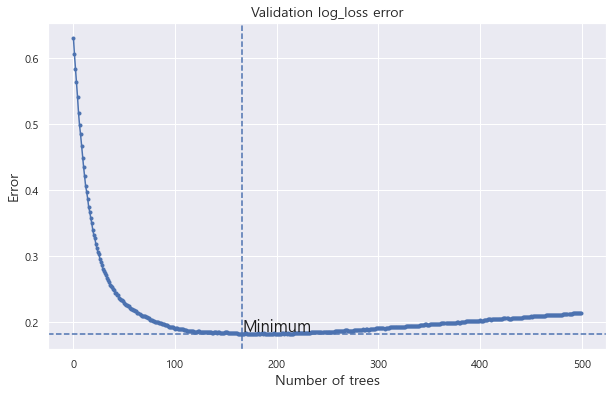

In [128]:
gbrt = ensemble.GradientBoostingClassifier(max_depth=1, n_estimators=500, warm_start=True,
                                  learning_rate=0.05, random_state=42)
gbrt.fit(X_train, y_train)
errors = [metrics.log_loss(y_test, y_proba)
          for y_proba in gbrt.staged_predict_proba(X_test)]

plt.figure(figsize=(10, 6)); plt.plot(errors, "b.-")
plt.axhline(y= np.min(errors), linestyle='--'); plt.axvline(x= np.argmin(errors), linestyle='--')
plt.text(np.argmin(errors), np.min(errors)*1.02, "Minimum", color='k', fontsize=16)
plt.xlabel("Number of trees",fontsize=14); plt.ylabel("Error", fontsize=14); 
plt.title("Validation log_loss error", fontsize=14)

print('최소 로그손실 값은:', np.min(errors))
print('의사결정트리 개수:',np.argmin(errors))
print('learning_rate', gbrt.get_params()['learning_rate'])

# Stacking and Blending model 
- Stacked generalization is a method for combining estimators to reduce their biases .
- More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. 
- This final estimator is trained through cross-validation.

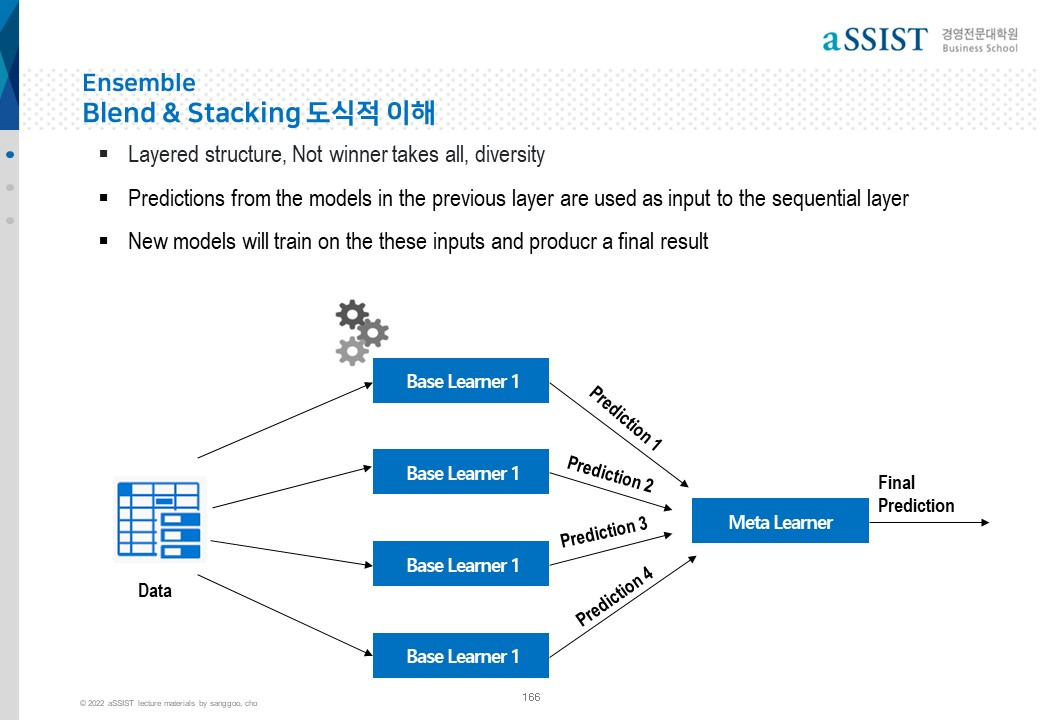

In [122]:
Image(filename=dir_path +'/슬라이드166.jpg', width=width, height=height)

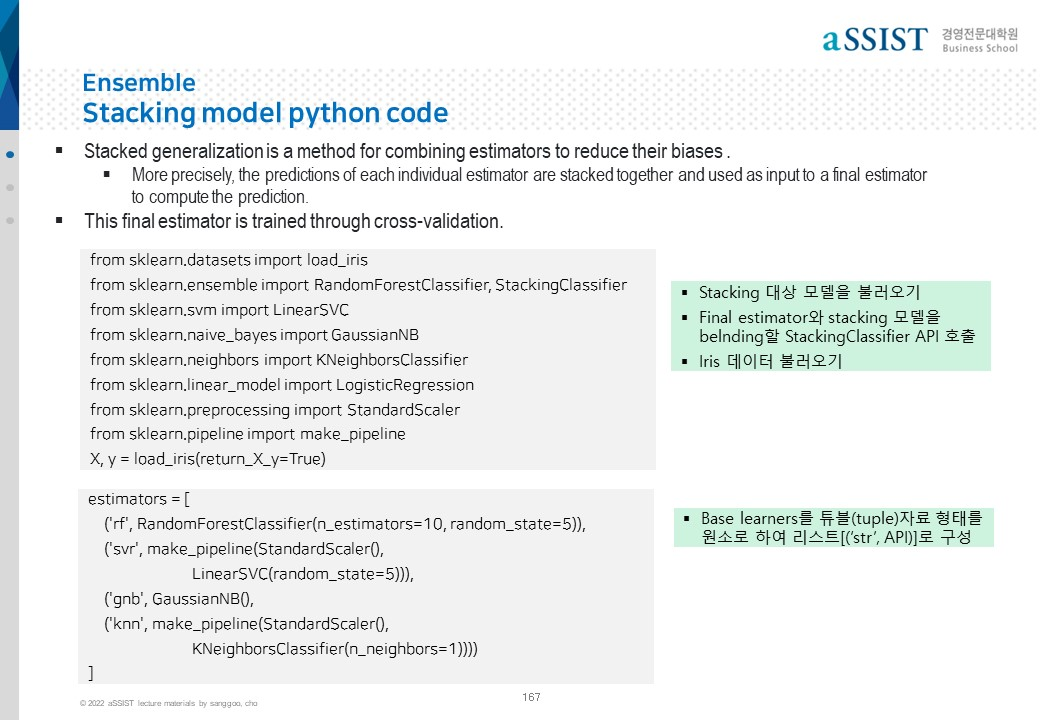

In [129]:
Image(filename=dir_path +'/슬라이드167.jpg', width=width, height=height)

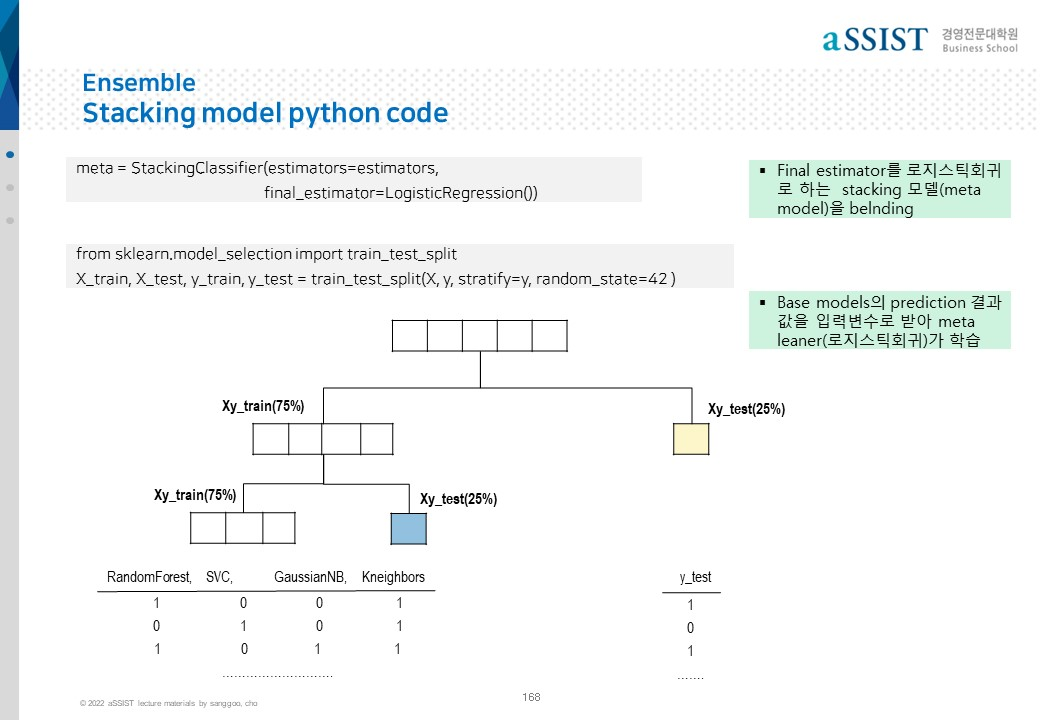

In [130]:
Image(filename=dir_path +'/슬라이드168.jpg', width=width, height=height)

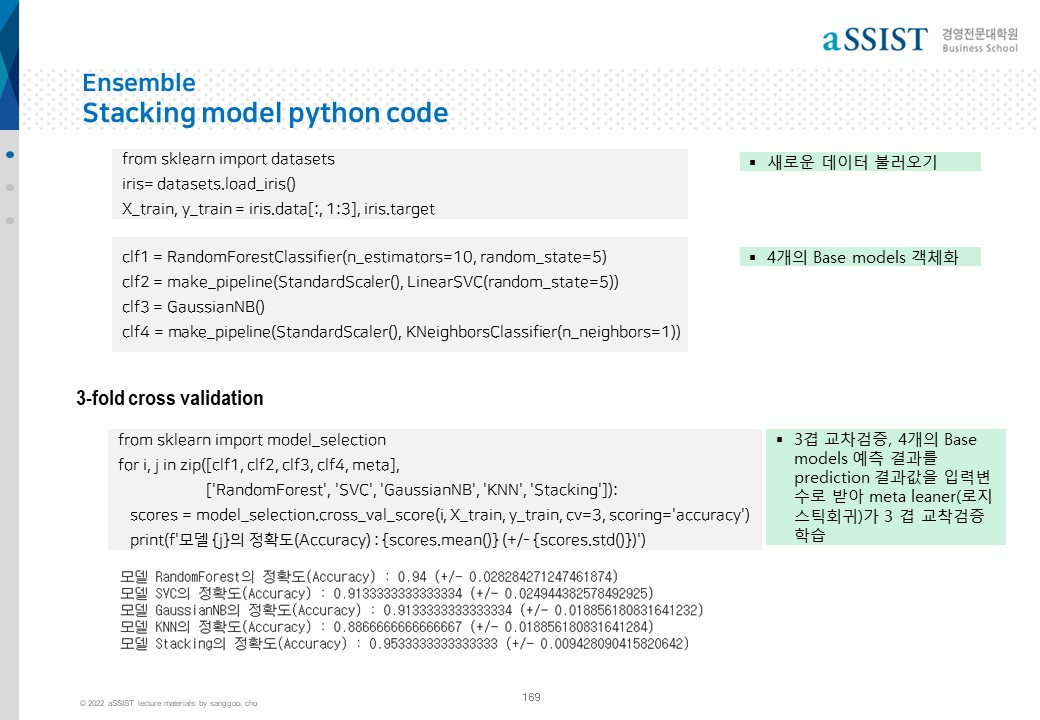

In [131]:
Image(filename=dir_path +'/슬라이드169.jpg', width=width, height=height)

## Step 1
- Stacking 대상 모델을 불러오기 
- Final estimator와 stacking 모델을 belnding할 StackingClassifier API 호출
- Iris 데이터 불러오기

## Step 2
- base learners  정의
- Base learners를 튜블(tuple)자료 형태를 원소로 하여 리스트[(‘str’, API)]로 구성

## Step 3
- stacking classifiers and meta model 정의
- Final estimator를 로지스틱회귀로 하는  stacking 모델(meta model)을 belnding

## Step 4
- Base models의 prediction 결과값을 입력변수로 받아 meta leaner(로지스틱회귀)가 학습

## Understanding of Stacking and Blending with cross validation
### 4개의 모델로 stacking한 내부 작동방식 이해

In [133]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 

## Step 1
- 데이터 불러오기

In [134]:
from sklearn.datasets import load_wine
data  = load_wine()
df = pd.DataFrame(data.data, columns = data['feature_names'])
df['target'] = data.target
df[100::2].loc[df['target'] == 2, 'target']  = 0
df[101::2].loc[df['target'] == 2, 'target']  = 1
X = df[data['feature_names']]
y = df['target']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape

((142, 13), (36, 13))

## Step 2
- 4개의 Base models 객체화

In [135]:
from sklearn import ensemble

In [136]:
clf1 = ensemble.RandomForestClassifier(n_estimators=10, random_state=5)
clf2 = make_pipeline(StandardScaler(), SVC(random_state=5))
clf3 = GaussianNB()
clf4 = make_pipeline(StandardScaler(), KNeighborsClassifier())

## Step 3
- 3겹 교차검증, 4개의 Base models 예측 결과를 prediction 결과값을 입력변수로 받아 meta leaner(로지스틱회귀)가 3 겹 교착검증 학습

In [137]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=5)),
    ('svr', make_pipeline(StandardScaler(),SVC(random_state=5))),
    ('gnb', GaussianNB(),
    ('knn', make_pipeline(StandardScaler(),KNeighborsClassifier())))
]
meta = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()) 

In [138]:
from sklearn import model_selection
list = zip([clf1, clf2, clf3, clf4, meta], 
           ['RandomForest', 'SVC', 'GaussianNB', 'KNN', 'Stacking'])
for classifier, name in list:
    scores = model_selection.cross_val_score(classifier, X_train, y_train, cv=3)
    print(f'모델 {name}의 정확도(Accuracy) : {scores.mean()}')
    #y_predict = classifier.fit(X_train, y_train).predict(X_test)
    #print(classification_report(y_test, y_predict))
print('*'*70)
y_predict = meta.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

모델 RandomForest의 정확도(Accuracy) : 0.7956560283687942
모델 SVC의 정확도(Accuracy) : 0.8169326241134751
모델 GaussianNB의 정확도(Accuracy) : 0.8312647754137116
모델 KNN의 정확도(Accuracy) : 0.7609338061465721
모델 Stacking의 정확도(Accuracy) : 0.8028959810874704
**********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.82      0.95      0.88        19

    accuracy                           0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.87      0.86      0.86        36



# Wrap up

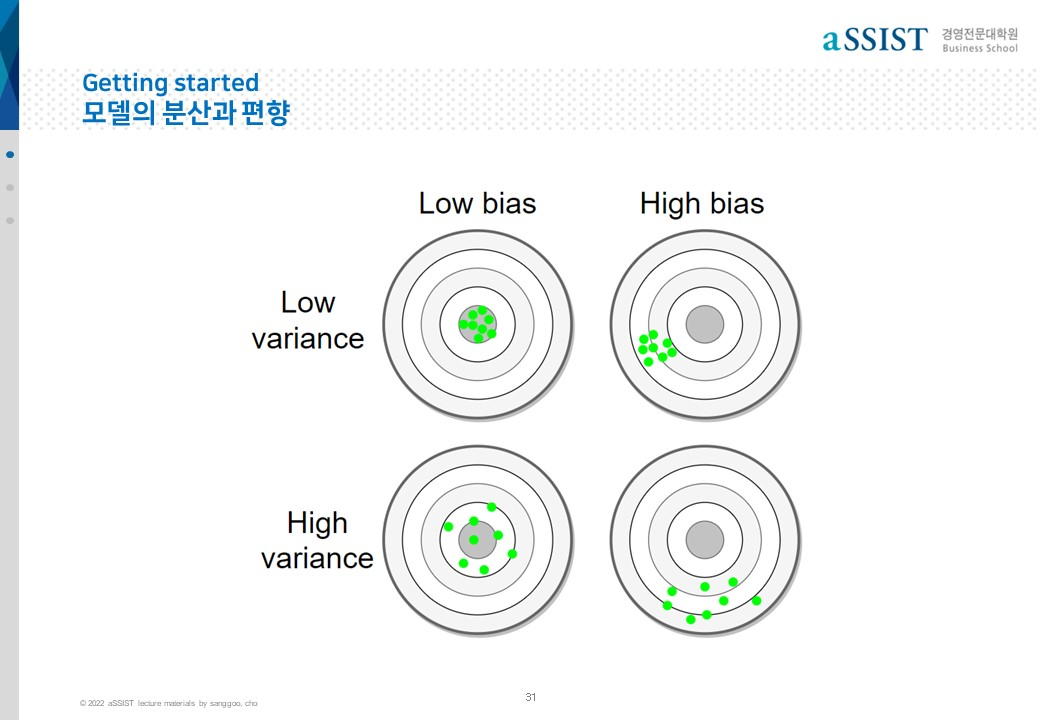

In [143]:
Image(filename=dir_path +'/슬라이드31.jpg', width=width, height=height)

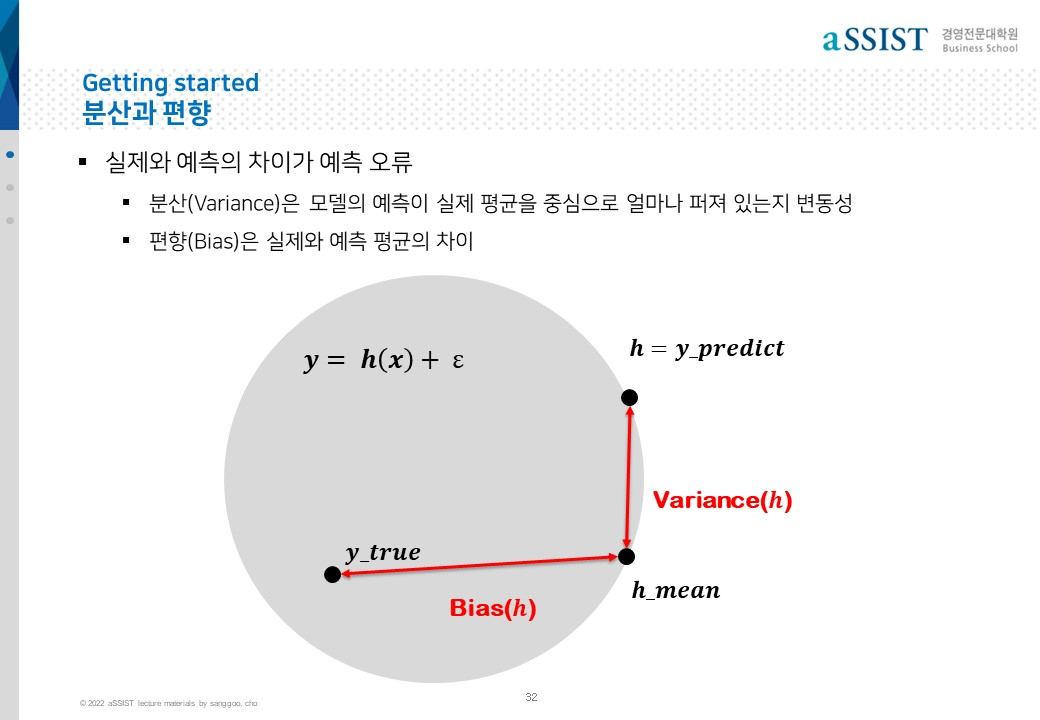

In [144]:
Image(filename=dir_path +'/슬라이드32.jpg', width=width, height=height)

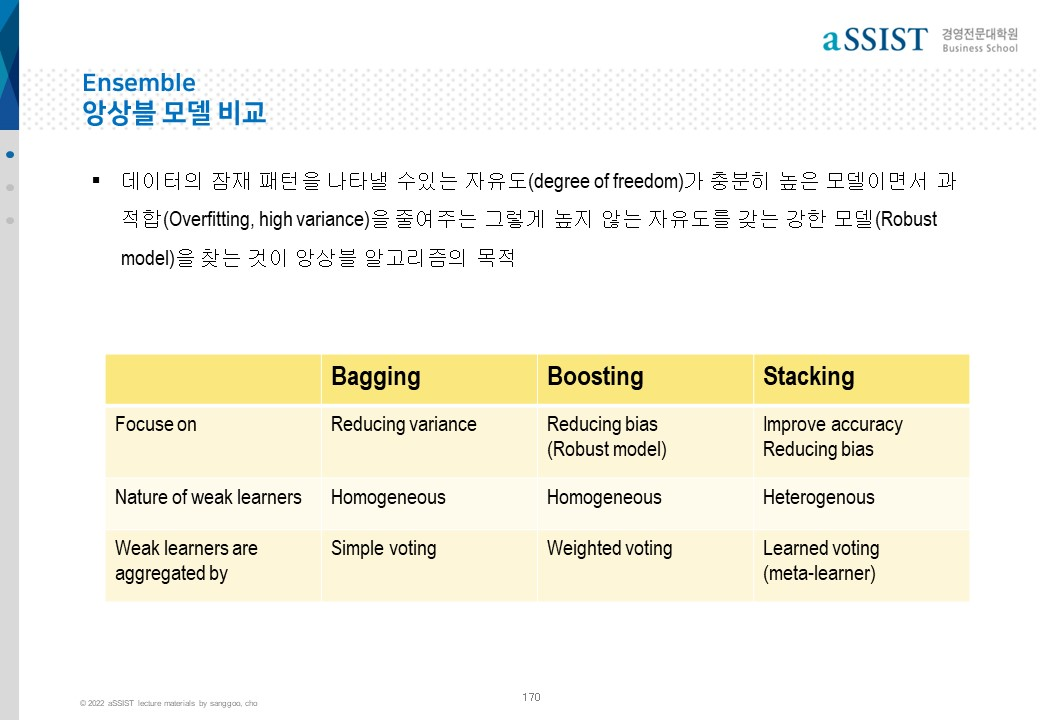

In [139]:
Image(filename=dir_path +'/슬라이드170.jpg', width=width, height=height)

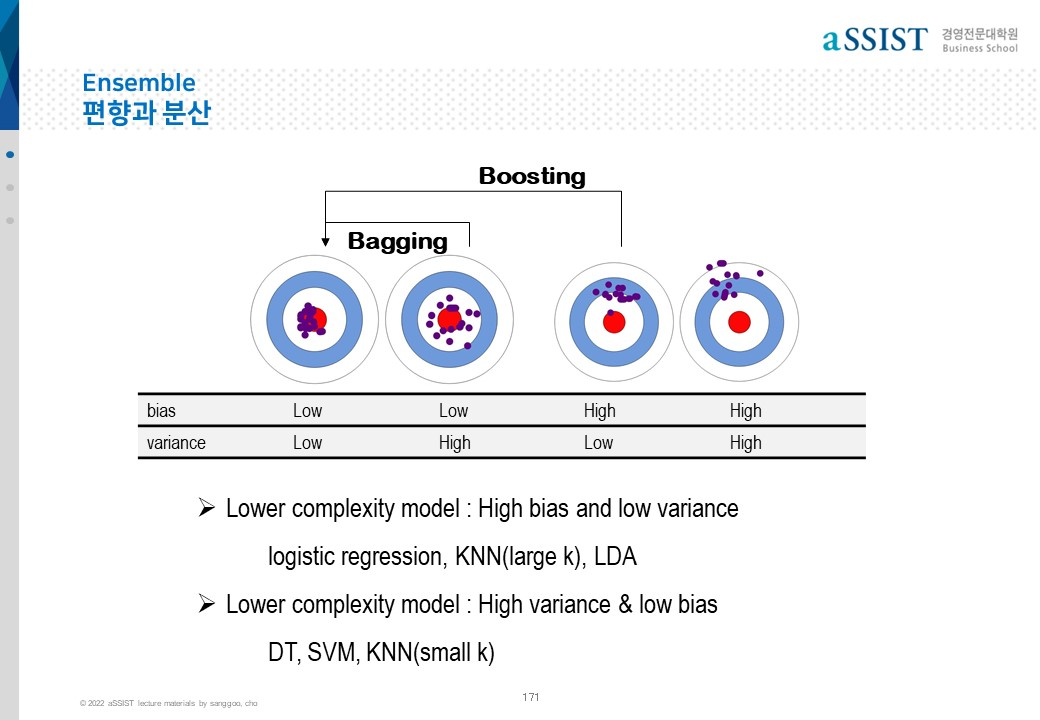

In [140]:
Image(filename=dir_path +'/슬라이드171.jpg', width=width, height=height)

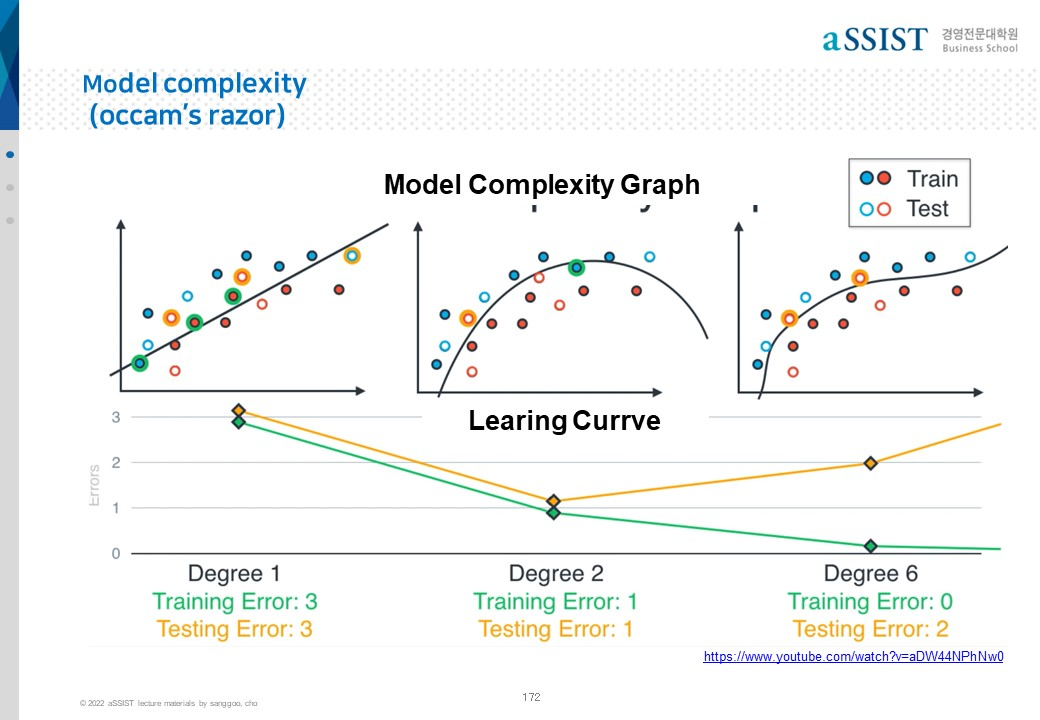

In [141]:
Image(filename=dir_path +'/슬라이드172.jpg', width=width, height=height)

## Classifier comparison
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

<img src = 'https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png'>

# End

### <font color='red'> 실습_Bagging with wine dataset

In [82]:
from sklearn.datasets import load_wine
data  = load_wine()
df = pd.DataFrame(data.data, columns = data['feature_names'])
df['target'] = data.target

df[100::2].loc[df['target'] == 2, 'target']  = 0
df[101::2].loc[df['target'] == 2, 'target']  = 1

X = df[data['feature_names']]
y = df['target']

In [83]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [84]:
stump= tree.DecisionTreeClassifier(max_depth=1, random_state=1355) # very weak decesion tree algorithm (1 depth)

bag = ensemble.BaggingClassifier(stump, 
                        n_estimators = 500, 
                        max_samples =0.8)

y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.8888888888888888

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.86      0.95      0.90        19

    accuracy                           0.89        36
   macro avg       0.90      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



### <font color='red'> 실습_Randomforest with boston_house dataset - Regression

In [85]:
from sklearn import datasets
dataset = datasets.load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

mean = df['target'].mean()
df['target'] = df['target']

X = df[df.columns[0:-1]] # X = df.drop(['target'], axis=1)
y = df['target']

In [86]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=11)
regr = ensemble.RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test) # Return the coefficient of determination R^^2 of the prediction.

RandomForestRegressor(max_depth=2, random_state=0)

0.6676077608382254

# End